# Step 1: analysing signals

# This code reads all the files and adds a time stamp to them

In [34]:

import csv
import datetime
import os

def process_sensor_file(input_filename, output_filename, sampling_rate, header):
    with open(input_filename, 'r') as input_file:
        reader = csv.reader(input_file)

        # Get the start time from the first row
        start_time_unix = float(next(reader)[0])
        start_time = datetime.datetime.fromtimestamp(start_time_unix)

        # Skip rows depending on the sensor
        if header == 'EDA' or header == 'BVP':
            for _ in range(3):
                next(reader)
        elif header == 'HR'or 'IBI':
            next(reader)

        # Process the data
        processed_data = []
        for i, row in enumerate(reader):
            current_time = start_time + datetime.timedelta(seconds=(i / sampling_rate))
            current_time_str = current_time.strftime('%H:%M:%S')
            #add this to add years month and day %Y-%m-%d %H:%M:%S
            processed_data.append([current_time_str] + row)

    with open(output_filename, 'w', newline='') as output_file:
        writer = csv.writer(output_file)

        # Write the header row
        writer.writerow(['Timestamp', header])

        # Write the processed data
        for row in processed_data:
            writer.writerow(row)

    print(f"Output written to '{output_filename}'")

base_directory = "C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data"

for participant_number in range(1, 36):
    participant_id = f"S{participant_number:02}"
    print(f"Processing participant {participant_id}")

    # Process EDA file
    input_filename = os.path.join(base_directory, participant_id, "EDA.csv")
    output_filename = os.path.join(base_directory, participant_id, "EDA_with_time.csv")
    process_sensor_file(input_filename, output_filename, sampling_rate=4, header='EDA')

    # Process BVP file
    input_filename = os.path.join(base_directory, participant_id, "BVP.csv")
    output_filename = os.path.join(base_directory, participant_id, "BVP_with_time.csv")
    process_sensor_file(input_filename, output_filename, sampling_rate=64, header='BVP')

    # Process HR file
    input_filename = os.path.join(base_directory, participant_id, "HR.csv")
    output_filename = os.path.join(base_directory, participant_id, "HR_with_time.csv")
    process_sensor_file(input_filename, output_filename, sampling_rate=1, header='HR')


Processing participant S01
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S01\EDA_with_time.csv'
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S01\BVP_with_time.csv'
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S01\HR_with_time.csv'
Processing participant S02
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S02\EDA_with_time.csv'
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S02\BVP_with_time.csv'
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S02\HR_with_time.csv'
Processing participant S03
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S03\ED

Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S20\BVP_with_time.csv'
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S20\HR_with_time.csv'
Processing participant S21
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S21\EDA_with_time.csv'
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S21\BVP_with_time.csv'
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S21\HR_with_time.csv'
Processing participant S22
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S22\EDA_with_time.csv'
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S22\BVP_with_time.csv'
Output wri

Average HR during Baseline/Questionnaire: 68.5495820895522
Average HR during Stroop Test: 72.24360995850621
Average HR during Relax1: 68.96655737704917
Average HR during Interview: 71.10374376039933
Average HR during Relax2: 65.31544850498342
Average HR during Hyperventilation: 69.05922651933702
Average HR during Relax3: 77.36677740863783
Average HR during Questionnaire: 69.6022923588039
Average HR during Relax/Baseline: 79.11951666666674


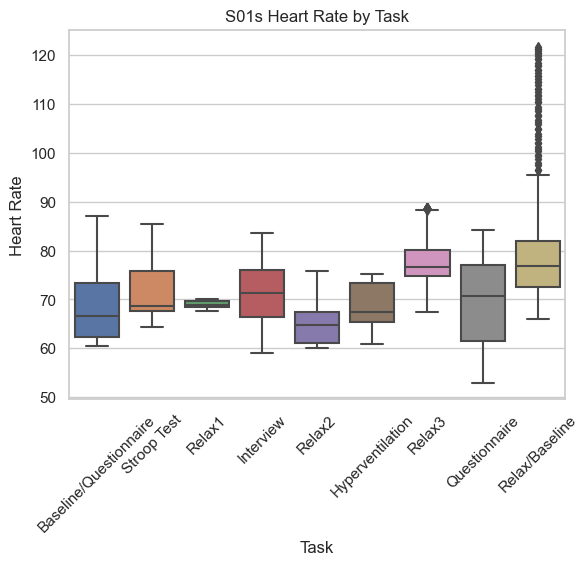

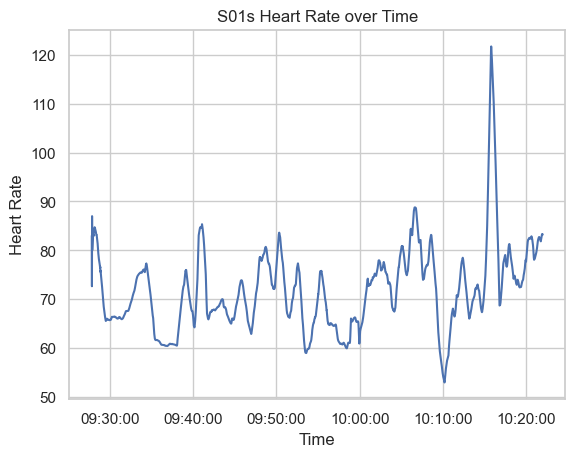

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

input_filename = 'C:\\Users\\fahad\\Documents\\PostGrad\\CE888\\Stress_dataset\\Stress-Predict-Dataset-main\\Raw_data\\S01\\HR.csv'

tasks = {
    'Baseline/Questionnaire': ("09:27:41", "09:39:00"),
    'Stroop Test': ("09:39:00", "09:43:00"),
    'Relax1': ("09:43:00", "09:44:00"),
    'Interview': ("09:44:00", "09:54:00"),
    'Relax2': ("09:54:00", "09:59:00"),
    'Hyperventilation': ("09:59:00", "10:02:00"),
    'Relax3': ("10:02:00", "10:07:00"),
    'Questionnaire': ("10:07:00", "10:12:00"),
    'Relax/Baseline': ("10:12:00", "10:22:00")
}

hr_data = pd.read_csv(input_filename, header=None, skiprows=3, names=['HR'])

hr_data['Timestamp'] = pd.date_range(
    start="2022-02-07 09:27:51", periods=len(hr_data), freq=pd.Timedelta(seconds=1), tz='UTC'
)

task_hr_data = []

for task, (start_time, end_time) in tasks.items():
    start_time = pd.Timestamp(f"2022-02-07 {start_time}", tz='UTC')
    end_time = pd.Timestamp(f"2022-02-07 {end_time}", tz='UTC')
    task_data = hr_data[(hr_data['Timestamp'] >= start_time) & (hr_data['Timestamp'] <= end_time)]
    
    avg_hr = task_data['HR'].mean()
    print(f"Average HR during {task}: {avg_hr}")
    
    task_hr_data.append(task_data['HR'])

task_hr_data = pd.DataFrame(task_hr_data).T
task_hr_data.columns = tasks.keys()

sns.boxplot(data=task_hr_data)
plt.xticks(ticks=range(len(tasks)), labels=tasks.keys(), rotation=45)
plt.title('S01s Heart Rate by Task')
plt.xlabel('Task')
plt.ylabel('Heart Rate')
plt.show()

import matplotlib as mpl

# Time series plot of HR data
plt.plot(hr_data['Timestamp'], hr_data['HR'])
plt.title('S01s Heart Rate over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M:%S'))
plt.show()

import seaborn as sns

task_hr_data = []
for task, (start_time, end_time) in tasks.items():
    start_time = pd.Timestamp(f"2022-02-07 {start_time}", tz='UTC')
    end_time = pd.Timestamp(f"2022-02-07 {end_time}", tz='UTC')
    task_data = hr_data[(hr_data['Timestamp'] >= start_time) & (hr_data['Timestamp'] <= end_time)]

    task_hr_data.append(task_data['HR'].values)


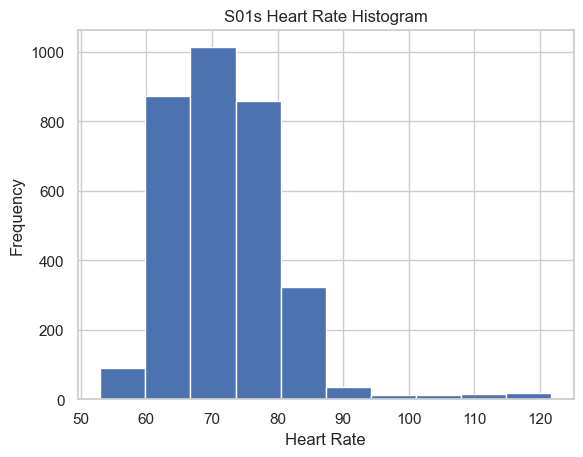

In [36]:
#histogram
plt.hist(hr_data['HR'])
plt.title('S01s Heart Rate Histogram')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

In [37]:


#histogram tells us that on average the Heart beat for this inidivudual was roughly between 65-75
#participant did have some high recorded HR of up to 120, several different occaisions,
#information from the time log mentioned that this participants test was an hour, all tests are roughly the same length
#stroop test is usually 5-6 minutes
#interview is usually 9-10 mins
#hyperventilation is usually 2 mins
#expect to see peaks at times close to hyperventilation

Average HR for S01 during Baseline/Questionnaire: 68.65142647058818
Average HR for S01 during Stroop Test: 71.96614107883813
Average HR for S01 during Relax1: 68.69622950819671
Average HR for S01 during Interview: 71.00479201331113
Average HR for S01 during Relax2: 65.4666445182724
Average HR for S01 during Hyperventilation: 69.62209944751382
Average HR for S01 during Relax3: 77.5906644518272
Average HR for S01 during Questionnaire: 69.34561461794011
Average HR for S01 during Relax/Baseline: 79.1971694915255
Average HR for S07 during Baseline/Questionnaire: 71.41236272878538
Average HR for S07 during Stroop Test: 72.0385049833887
Average HR for S07 during Relax1: 72.57289036544849
Average HR for S07 during Interview: 73.23628951747096
Average HR for S07 during Relax2: 68.58182724252487
Average HR for S07 during Hyperventilation: 71.72685950413222
Average HR for S07 during Relax3: 73.31843853820598
Average HR for S07 during Questionnaire: 68.15428571428573
Average HR for S07 during Rela

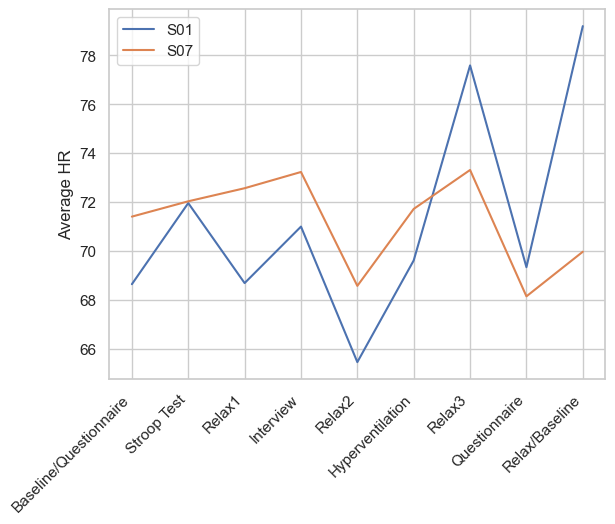

In [38]:
#Comparing s01s heart rate to another participants.

tasks_S07 = {
    'Baseline/Questionnaire': ("10:31:00", "10:41:00"),
    'Stroop Test': ("10:43:00", "10:48:00"),
    'Relax1': ("10:48:00", "10:53:00"),
    'Interview': ("10:53:00", "11:03:00"),
    'Relax2': ("11:03:00", "11:08:00"),
    'Hyperventilation': ("11:09:00", "11:11:00"),
    'Relax3': ("11:11:00", "11:16:00"),
    'Questionnaire': ("11:16:00", "11:21:00"),
    'Relax/Baseline': ("11:21:00", "11:26:00")
}
participant_ids = ['S01', 'S07']
task_dict = {
    'S01': tasks,
    'S07': tasks_S07
}

task_averages = {}

for participant_id in participant_ids:
    task_averages[participant_id] = {}
    
    # Read the HR data for the current participant
    input_filename = f"C:\\Users\\fahad\\Documents\\PostGrad\\CE888\\Stress_dataset\\Stress-Predict-Dataset-main\\Raw_data\\{participant_id}\\HR.csv"
    hr_data = pd.read_csv(input_filename, header=None, skiprows=3, names=['HR'])
    
    # Add a timestamp column
    hr_data['Timestamp'] = pd.date_range(
        start=f"2022-02-07 {task_dict[participant_id]['Baseline/Questionnaire'][0]}", periods=len(hr_data), freq=pd.Timedelta(seconds=1), tz='UTC'
    )
    
    # Calculate the average HR for each task
    for task, (start_time, end_time) in task_dict[participant_id].items():
        start_time = pd.Timestamp(f"2022-02-07 {start_time}", tz='UTC')
        end_time = pd.Timestamp(f"2022-02-07 {end_time}", tz='UTC')
        task_data = hr_data[(hr_data['Timestamp'] >= start_time) & (hr_data['Timestamp'] <= end_time)]
        
        avg_hr = task_data['HR'].mean()
        task_averages[participant_id][task] = avg_hr
        print(f"Average HR for {participant_id} during {task}: {avg_hr}")



fig, ax = plt.subplots()

x_ticks = list(tasks.keys())
x = range(len(x_ticks))

for participant_id, averages in task_averages.items():
    y = [averages[task] for task in x_ticks]
    ax.plot(x, y, label=participant_id)

ax.set_xticks(x)
ax.set_xticklabels(x_ticks, rotation=45, ha='right')
ax.set_ylabel('Average HR')
ax.legend()
plt.show()

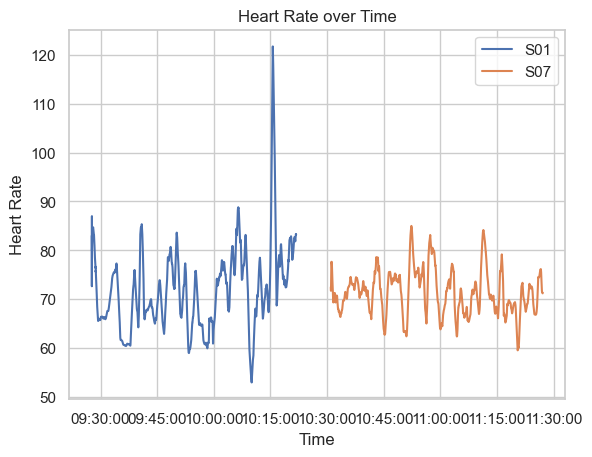

In [39]:
fig, ax = plt.subplots()

for participant_id, averages in task_averages.items():
    input_filename = f"C:\\Users\\fahad\\Documents\\PostGrad\\CE888\\Stress_dataset\\Stress-Predict-Dataset-main\\Raw_data\\{participant_id}\\HR.csv"
    hr_data = pd.read_csv(input_filename, header=None, skiprows=3, names=['HR'])

    hr_data['Timestamp'] = pd.date_range(
        start=f"2022-02-07 {task_dict[participant_id]['Baseline/Questionnaire'][0]}", periods=len(hr_data), freq=pd.Timedelta(seconds=1), tz='UTC'
    )

    ax.plot(hr_data['Timestamp'], hr_data['HR'], label=participant_id)

plt.title('Heart Rate over Time')
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.gca().xaxis.set_major_formatter(mpl.dates.DateFormatter('%H:%M:%S'))
plt.legend()
plt.show()

In [40]:
#lets analyse another signal 
#EDA
#Adding timestamps to the EDA files to get a better understanding of when a user is going through 
# a stressful period


Number of missing values for S01 during Baseline/Questionnaire: 0
Average EDA for S01 during Baseline/Questionnaire: 0.1903265411764702
Number of missing values for S01 during Stroop Test: 0
Average EDA for S01 during Stroop Test: 0.21044460995850645
Number of missing values for S01 during Relax1: 0
Average EDA for S01 during Relax1: 0.21380122950819686
Number of missing values for S01 during Interview: 0
Average EDA for S01 during Interview: 0.22310015474209668
Number of missing values for S01 during Relax2: 0
Average EDA for S01 during Relax2: 0.24709475083056454
Number of missing values for S01 during Hyperventilation: 0
Average EDA for S01 during Hyperventilation: 0.25935134254143616
Number of missing values for S01 during Relax3: 0
Average EDA for S01 during Relax3: 0.2719068006644517
Number of missing values for S01 during Questionnaire: 0
Average EDA for S01 during Questionnaire: 0.22684589036544842
Number of missing values for S01 during Relax/Baseline: 0
Average EDA for S01 du

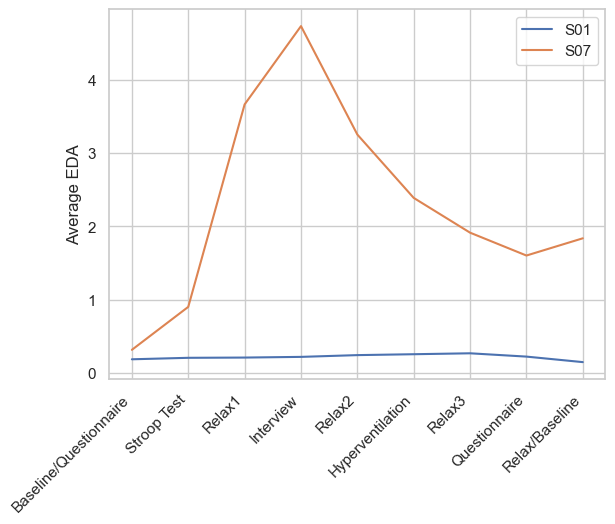

In [41]:


task_averages = {}

for participant_id in participant_ids:
    task_averages[participant_id] = {}

    # Read the EDA data for the current participant
    input_filename = f"C:\\Users\\fahad\\Documents\\PostGrad\\CE888\\Stress_dataset\\Stress-Predict-Dataset-main\\Raw_data\\{participant_id}\\EDA.csv"
    eda_data = pd.read_csv(input_filename, header=None, skiprows=3, names=['EDA'])

    # Add a timestamp column
    eda_data['Timestamp'] = pd.date_range(
        start=f"2022-02-07 {task_dict[participant_id]['Baseline/Questionnaire'][0]}", periods=len(eda_data), freq=pd.Timedelta(seconds=1), tz='UTC'
    )

    # Calculate the average EDA for each task
    for task, (start_time, end_time) in task_dict[participant_id].items():
        start_time = pd.Timestamp(f"2022-02-07 {start_time}", tz='UTC')
        end_time = pd.Timestamp(f"2022-02-07 {end_time}", tz='UTC')
        task_data = eda_data[(eda_data['Timestamp'] >= start_time) & (eda_data['Timestamp'] <= end_time)]
        
        # Debugging code: check for missing values
        print(f"Number of missing values for {participant_id} during {task}: {task_data['EDA'].isna().sum()}")
        
        avg_eda = task_data['EDA'].mean()
        task_averages[participant_id][task] = avg_eda
        print(f"Average EDA for {participant_id} during {task}: {avg_eda}")
        
fig, ax = plt.subplots()

x_ticks = list(tasks.keys())
x = range(len(x_ticks))

for participant_id, averages in task_averages.items():
    y = [averages[task] for task in x_ticks]
    ax.plot(x, y, label=participant_id)

ax.set_xticks(x)
ax.set_xticklabels(x_ticks, rotation=45, ha='right')
ax.set_ylabel('Average EDA')
ax.legend()
plt.show()


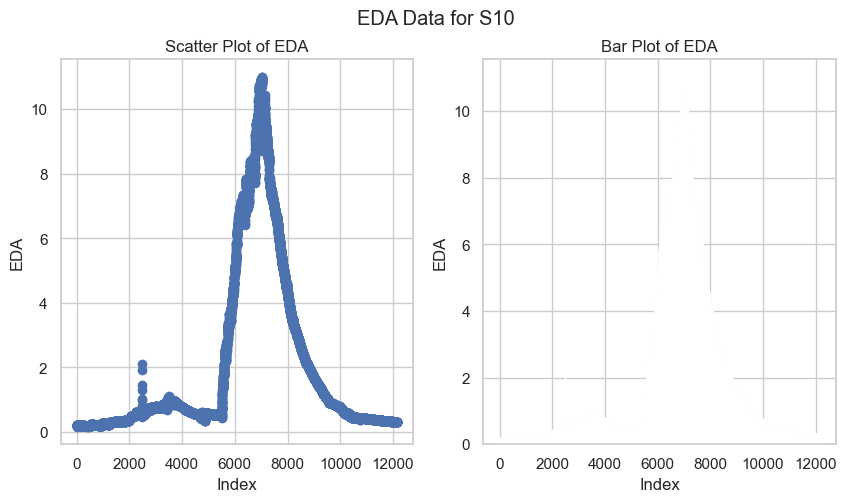

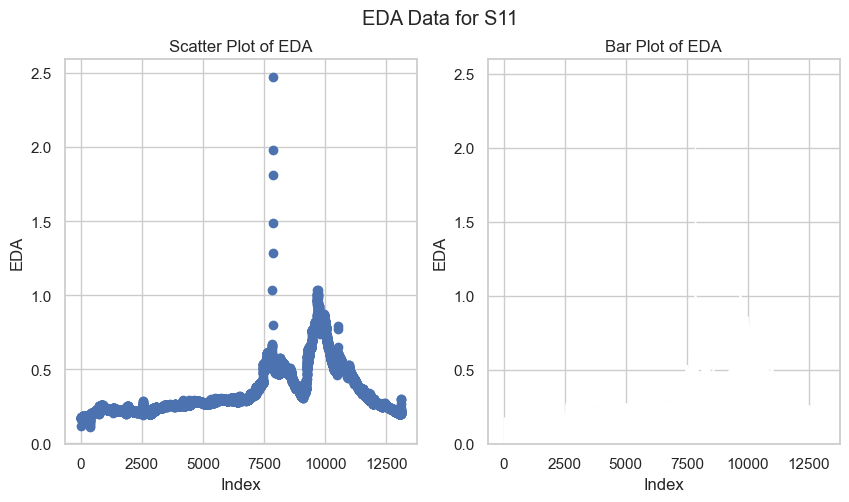

In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt
#eda plots
#not the most appropriate for this dataset

def read_eda(participant_id, base_dir):
    file_path = os.path.join(base_dir, participant_id, "EDA.csv")
    return pd.read_csv(file_path, header=None, names=['EDA'], skiprows=3)

def plot_eda(participant_id, eda_data):
    plt.figure(figsize=(10, 5))
    
    # Scatter plot
    plt.subplot(1, 2, 1)
    plt.scatter(eda_data.index, eda_data['EDA'], label=participant_id)
    plt.xlabel('Index')
    plt.ylabel('EDA')
    plt.title('Scatter Plot of EDA')
    
    # Bar plot
    plt.subplot(1, 2, 2)
    plt.bar(eda_data.index, eda_data['EDA'], label=participant_id)
    plt.xlabel('Index')
    plt.ylabel('EDA')
    plt.title('Bar Plot of EDA')
    
    plt.suptitle(f'EDA Data for {participant_id}')
    plt.show()

base_dir = "C:\\Users\\fahad\\Documents\\PostGrad\\CE888\\Stress_dataset\\Stress-Predict-Dataset-main\\Raw_data"
participants = ["S10", "S11"]

for participant_id in participants:
    eda_data = read_eda(participant_id, base_dir)
    plot_eda(participant_id, eda_data)



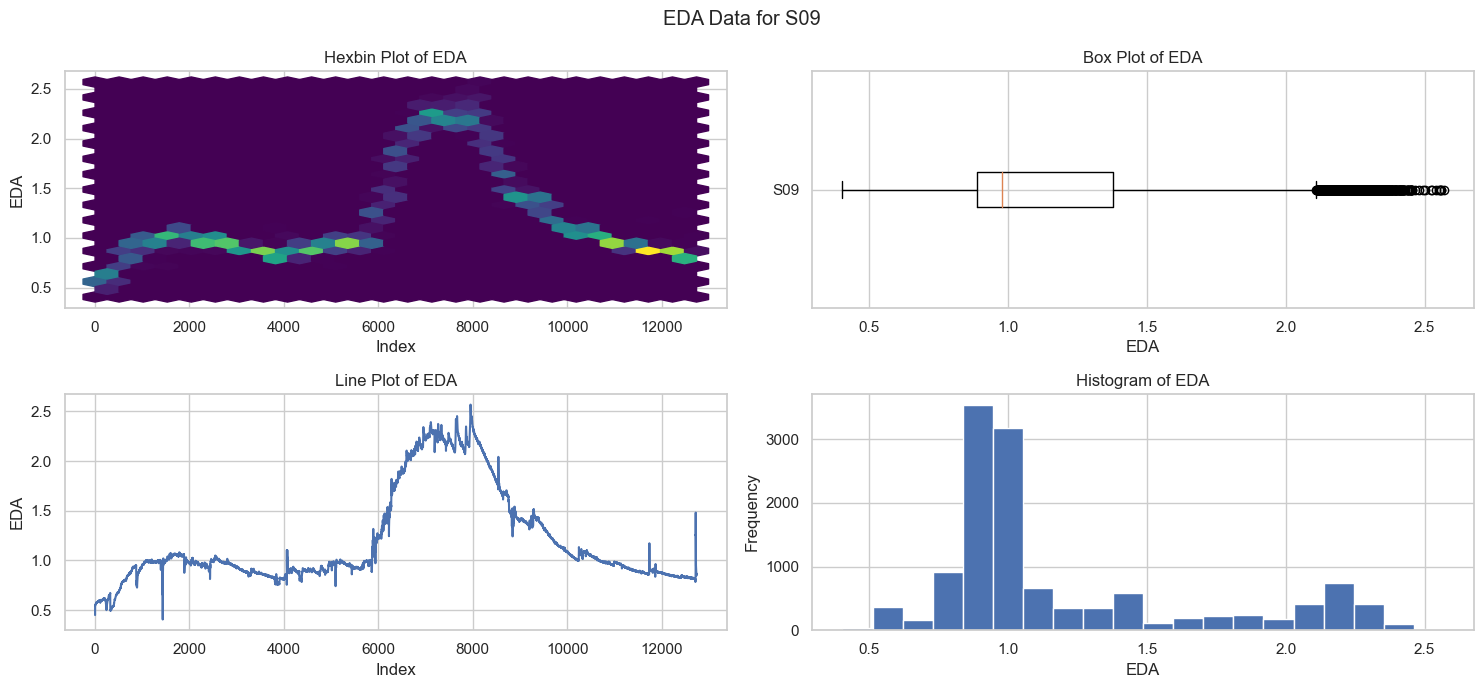

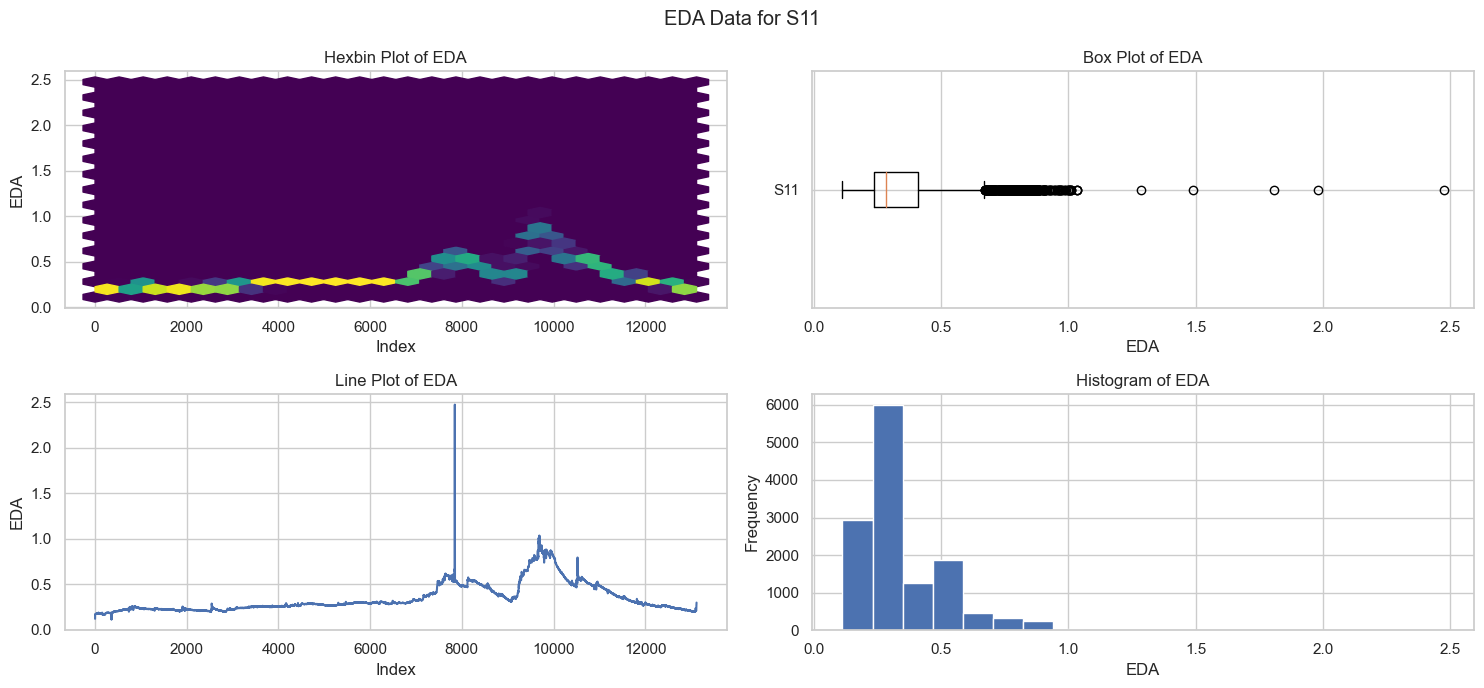

In [43]:

def read_eda(participant_id, base_dir):
    file_path = os.path.join(base_dir, participant_id, "EDA.csv")
    return pd.read_csv(file_path, header=None, names=['EDA'], skiprows=3)

def plot_eda(participant_id, eda_data):
    plt.figure(figsize=(15, 7))
    
    # Hexbin plot
    plt.subplot(2, 2, 1)
    plt.hexbin(eda_data.index, eda_data['EDA'], gridsize=25, cmap='viridis')
    plt.xlabel('Index')
    plt.ylabel('EDA')
    plt.title('Hexbin Plot of EDA')
    
    # Box plot
    plt.subplot(2, 2, 2)
    plt.boxplot(eda_data['EDA'], vert=False, labels=[participant_id])
    plt.xlabel('EDA')
    plt.title('Box Plot of EDA')
    
    # Line plot
    plt.subplot(2, 2, 3)
    plt.plot(eda_data.index, eda_data['EDA'], label=participant_id)
    plt.xlabel('Index')
    plt.ylabel('EDA')
    plt.title('Line Plot of EDA')
    
    # Histogram
    plt.subplot(2, 2, 4)
    plt.hist(eda_data['EDA'], bins=20, label=participant_id)
    plt.xlabel('EDA')
    plt.ylabel('Frequency')
    plt.title('Histogram of EDA')
    
    plt.suptitle(f'EDA Data for {participant_id}')
    plt.tight_layout()
    plt.show()

base_dir = "C:\\Users\\fahad\\Documents\\PostGrad\\CE888\\Stress_dataset\\Stress-Predict-Dataset-main\\Raw_data"
participants = ["S09", "S11"]

for participant_id in participants:
    eda_data = read_eda(participant_id, base_dir)
    plot_eda(participant_id, eda_data)



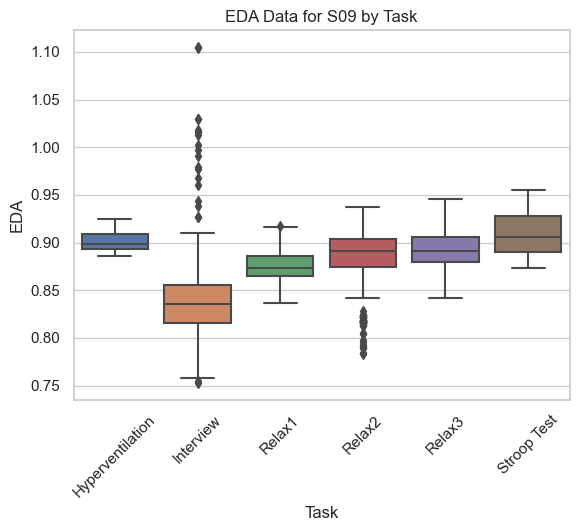

In [44]:
#Comparing Eda values of stressful tasks and non stressful tasks of multiple participants.

def read_eda(participant_id, base_dir):
    file_path = os.path.join(base_dir, participant_id, "EDA.csv")
    eda_df = pd.read_csv(file_path, header=None, names=['EDA'], skiprows=3)
    timestamp = pd.date_range(
        start="2022-02-21 00:00:00", periods=len(eda_df), freq=pd.Timedelta(seconds=1), tz='UTC'
    )
    eda_df['Timestamp'] = timestamp
    return eda_df

base_dir = "C:\\Users\\fahad\\Documents\\PostGrad\\CE888\\Stress_dataset\\Stress-Predict-Dataset-main\\Raw_data"

participant_id = 'S09'

tasks = {
    'Hyperventilation': ('01:14:00', '01:16:00'),
    'Interview': ('00:59:00', '01:09:00'),
    'Relax1': ('00:54:00', '00:59:00'),
    'Relax2': ('01:09:00', '01:14:00'),
    'Relax3': ('01:16:00', '01:21:00'),
    'Stroop Test': ('00:49:00', '00:54:00')
}

eda_data = read_eda(participant_id, base_dir)
task_eda_data = []

for task, (start_time, end_time) in tasks.items():
    start_time = pd.Timestamp(f"2022-02-21 {start_time}", tz='UTC')
    end_time = pd.Timestamp(f"2022-02-21 {end_time}", tz='UTC')
    task_data = eda_data[(eda_data['Timestamp'] >= start_time) & (eda_data['Timestamp'] <= end_time)]
    
    task_eda_data.append(task_data['EDA'])

task_eda_data = pd.DataFrame(task_eda_data).T
task_eda_data.columns = tasks.keys()

sns.boxplot(data=task_eda_data)
plt.xticks(ticks=range(len(tasks)), labels=tasks.keys(), rotation=45)
plt.title('EDA Data for S09 by Task')
plt.xlabel('Task')
plt.ylabel('EDA')
plt.show()


In [45]:
import csv
import datetime
import os
#Adding time to IBI file
#Since ibi file does not have a sample rate
#this is done seperatly 
def process_ibi_file(input_filename, output_filename):
    with open(input_filename, 'r') as input_file:
        reader = csv.reader(input_file)

        # Get the start time from the first row
        first_row = next(reader)
        start_time_unix = float(first_row[0])
        start_time = datetime.datetime.fromtimestamp(start_time_unix)

        # Process the data
        processed_data = []
        for row in reader:
            interval, ibi = row
            interval = float(interval)
            current_time = start_time + datetime.timedelta(seconds=interval)
            current_time_str = current_time.strftime('%m/%d/%Y %H:%M:%S')
            processed_data.append([interval, ibi, current_time_str])

    with open(output_filename, 'w', newline='') as output_file:
        writer = csv.writer(output_file)

        # Write the header row
        writer.writerow(['interval', 'IBI', 'actual_time'])

        # Write the processed data
        for row in processed_data:
            writer.writerow(row)

    print(f"Output written to '{output_filename}'")

base_directory = "C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data"

for participant_number in range(1, 36):
    participant_id = f"S{participant_number:02}"
    print(f"Processing participant {participant_id}")

    # Process IBI file
    input_filename = os.path.join(base_directory, participant_id, "IBI.csv")
    output_filename = os.path.join(base_directory, participant_id, "IBI_with_time.csv")
    process_ibi_file(input_filename, output_filename)




Processing participant S01
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S01\IBI_with_time.csv'
Processing participant S02
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S02\IBI_with_time.csv'
Processing participant S03
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S03\IBI_with_time.csv'
Processing participant S04
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S04\IBI_with_time.csv'
Processing participant S05
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S05\IBI_with_time.csv'
Processing participant S06
Output written to 'C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S06\IBI_with_time.csv'
Processing participant S07
Output 

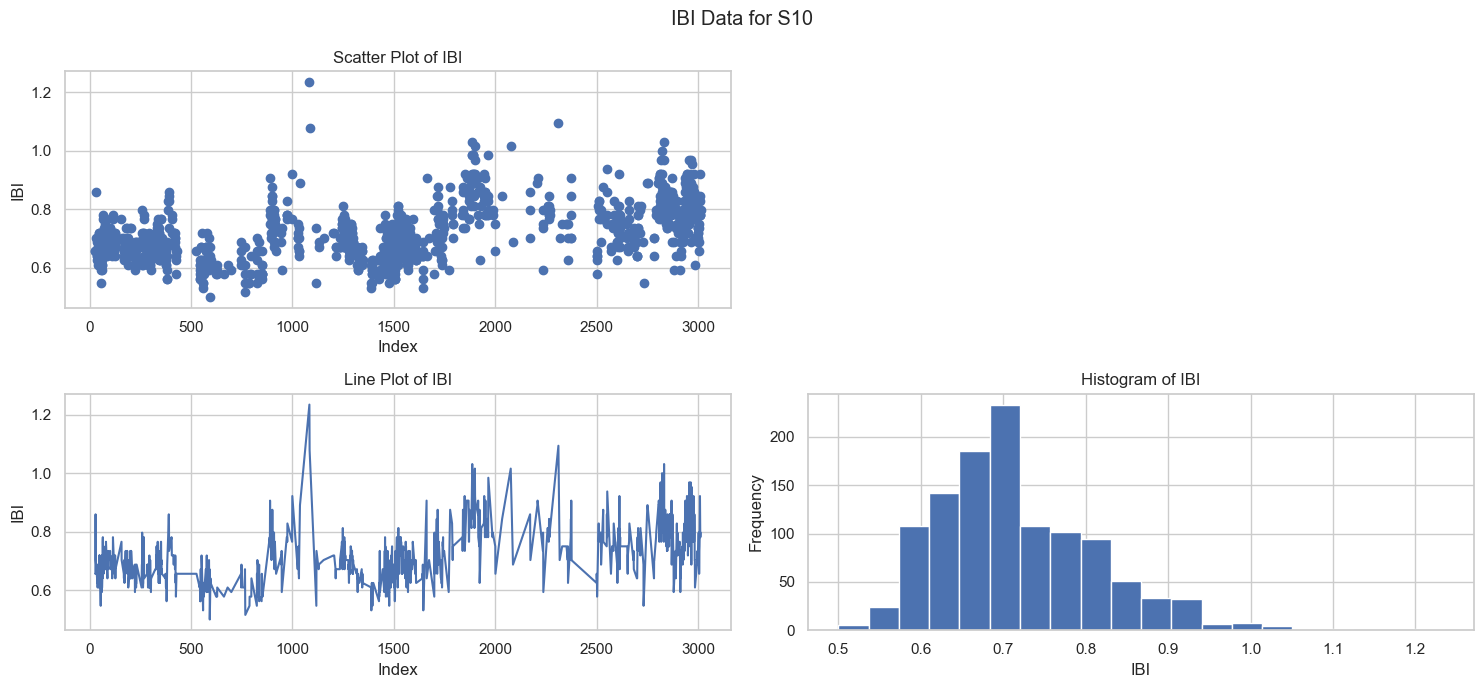

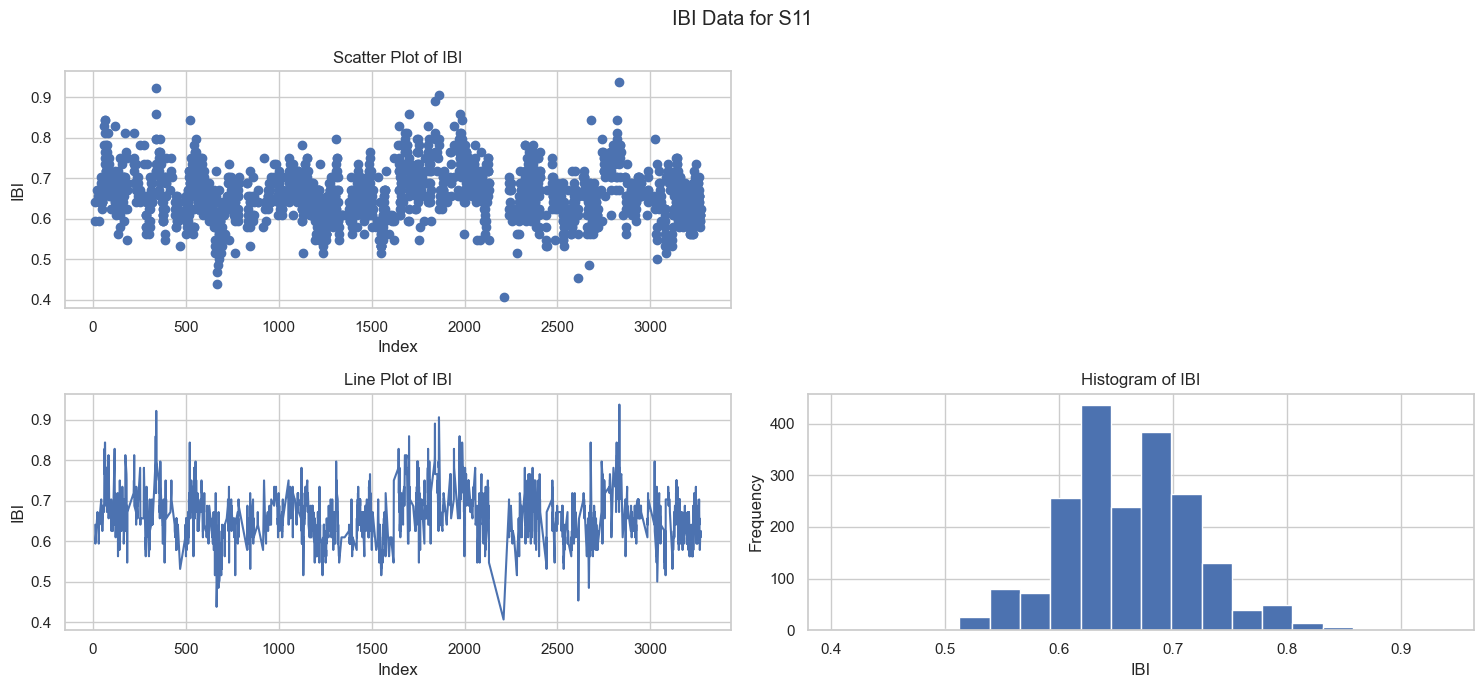

In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def read_ibi(participant_id, base_dir):
    file_path = os.path.join(base_dir, participant_id, "IBI.csv")
    return pd.read_csv(file_path, header=None, names=['IBI'], skiprows=3)

def plot_ibi(participant_id, ibi_data):
    plt.figure(figsize=(15, 7))
    
    # Scatter plot
    plt.subplot(2, 2, 1)
    plt.scatter(ibi_data.index, ibi_data['IBI'], label=participant_id)
    plt.xlabel('Index')
    plt.ylabel('IBI')
    plt.title('Scatter Plot of IBI')
    

    
    # Line plot
    plt.subplot(2, 2, 3)
    plt.plot(ibi_data.index, ibi_data['IBI'], label=participant_id)
    plt.xlabel('Index')
    plt.ylabel('IBI')
    plt.title('Line Plot of IBI')
    
    # Histogram
    plt.subplot(2, 2, 4)
    plt.hist(ibi_data['IBI'], bins=20, label=participant_id)
    plt.xlabel('IBI')
    plt.ylabel('Frequency')
    plt.title('Histogram of IBI')
    
    plt.suptitle(f'IBI Data for {participant_id}')
    plt.tight_layout()
    plt.show()

base_dir = "C:\\Users\\fahad\\Documents\\PostGrad\\CE888\\Stress_dataset\\Stress-Predict-Dataset-main\\Raw_data"
participants = ["S10", "S11"]

for participant_id in participants:
    ibi_data = read_ibi(participant_id, base_dir)
    plot_ibi(participant_id, ibi_data)


In [47]:
import pandas as pd
import numpy as np

# Load data from the CSV file
file_path = "C:\\Users\\fahad\\Documents\\PostGrad\\CE888\\Stress_dataset\\Stress-Predict-Dataset-main\\Raw_data\\S10\\IBI_with_time.csv"
data = pd.read_csv(file_path)

# Extract the Inter-Beat Intervals (IBIs)
ibis = data['IBI']

# Convert the IBIs to numeric values
ibis = pd.to_numeric(ibis, errors='coerce')

# Remove any rows with non-numeric values
ibis = ibis.dropna()

# Calculate the differences between successive IBIs
ibi_differences = np.diff(ibis)

# Calculate the squared differences
squared_differences = np.square(ibi_differences)

# Calculate RMSSD
rmssd = np.sqrt(np.mean(squared_differences))

# Calculate SDNN
sdnn = np.std(ibis)

print("RMSSD:", rmssd)
print("SDNN:", sdnn)


RMSSD: 0.07197001011313539
SDNN: 0.0943032697368756


In [48]:
import pandas as pd
import numpy as np
import os

def calculate_hrv_metrics(file_path):
    # Load data from the CSV file
    data = pd.read_csv(file_path)

    # Extract the Inter-Beat Intervals (IBIs)
    ibis = data['IBI']

    # Convert the IBIs to numeric values
    ibis = pd.to_numeric(ibis, errors='coerce')

    # Remove any rows with non-numeric values
    ibis = ibis.dropna()

    # Calculate the differences between successive IBIs
    ibi_differences = np.diff(ibis)

    # Calculate the squared differences
    squared_differences = np.square(ibi_differences)

    # Calculate RMSSD
    rmssd = np.sqrt(np.mean(squared_differences))

    # Calculate SDNN
    sdnn = np.std(ibis)

    return rmssd, sdnn

base_directory = "C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data"

for participant_number in range(1, 11):
    participant_id = f"S{participant_number:02}"
    print(f"Processing participant {participant_id}")

    file_path = os.path.join(base_directory, participant_id, "IBI_with_time.csv")
    rmssd, sdnn = calculate_hrv_metrics(file_path)

    print("RMSSD:", rmssd)
    print("SDNN:", sdnn)
    print("\n")


Processing participant S01
RMSSD: 0.06809355852041946
SDNN: 0.08581069198311543


Processing participant S02
RMSSD: 0.09316422731042312
SDNN: 0.0775027179735151


Processing participant S03
RMSSD: 0.06480167151103831
SDNN: 0.07143131351736251


Processing participant S04
RMSSD: 0.05134245924894803
SDNN: 0.09251217799426144


Processing participant S05
RMSSD: 0.04764973810572271
SDNN: 0.057735585058298615


Processing participant S06
RMSSD: 0.05632357143676516
SDNN: 0.07755892526585018


Processing participant S07
RMSSD: 0.06582052338331931
SDNN: 0.08515641366567137


Processing participant S08
RMSSD: 0.04151589012140497
SDNN: 0.05764484565091356


Processing participant S09
RMSSD: 0.03509305703529515
SDNN: 0.05293996659368051


Processing participant S10
RMSSD: 0.07197001011313539
SDNN: 0.0943032697368756




In [49]:
#BVP

### Step2 Preprocessing the dataset



In [50]:
#the first value in every file is the unix start time of when the event begins
#Looking at the sample rate of the HR file which is 1
#this meeans that each value in a participants HR column is 1 seconds long
#For participitant Hr data is roughly between 3200-3600 entry
#going to convert the time into a more human readable entry
#this will be helpful to identify when a user is going through a stressful task
#Hr events usually start 10 seconds earliar that is why the index is on 11
def downsample_eda(input_file, output_file):
    # Load the EDA data
    data = pd.read_csv(input_file, sep='\t', skiprows=1, dtype={0: str, 1: float})

    if data.shape[1] < 2:
        print(f"Skipping {input_file} due to insufficient columns.")
        return

    # Separate timestamp and EDA columns
    timestamp_data = data.iloc[:, 0]
    eda_data = data.iloc[:, 1]

    # Calculate the mean of every 4 rows, starting from row 4 (index 3)
    means = []
    for i in range(11, len(eda_data), 4):
        mean = eda_data.iloc[i:i+4].mean()
        means.append(mean)

    # Create a new DataFrame with the calculated means
    downsampled_data = pd.DataFrame(means)

    # Save the downsampled data to a new file
    downsampled_data.to_csv(output_file, index=False, header=None)

base_directory = "C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data"

for participant_number in range(1, 36):
    participant_id = f"S{participant_number:02}"
    print(f"Processing participant {participant_id}")

    # Downsample EDA file
    input_filename = os.path.join(base_directory, participant_id, "EDA_with_time.csv")
    output_filename = os.path.join(base_directory, participant_id, "EDA_downsampled.csv")
    downsample_eda(input_filename, output_filename)



Processing participant S01
Skipping C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S01\EDA_with_time.csv due to insufficient columns.
Processing participant S02
Skipping C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S02\EDA_with_time.csv due to insufficient columns.
Processing participant S03
Skipping C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S03\EDA_with_time.csv due to insufficient columns.
Processing participant S04
Skipping C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S04\EDA_with_time.csv due to insufficient columns.
Processing participant S05
Skipping C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data\S05\EDA_with_time.csv due to insufficient columns.
Processing participant S06
Skipping C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict

In [51]:
#Combining hr and eda files

def combine_hr_and_eda(hr_file, eda_file, output_file):
    hr_data = pd.read_csv(hr_file)
    eda_data = pd.read_csv(eda_file, header=None)
    # Remove the last 10 values of EDA
    eda_data = eda_data.iloc[:-9]

    combined_data = pd.concat([hr_data, eda_data], axis=1)
    combined_data.columns = ['Timestamp', 'HR', 'EDA']

    combined_data.to_csv(output_file, index=False)

base_directory = "C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data"

for participant_number in range(1, 36):
    participant_id = f"S{participant_number:02}"
    print(f"Processing participant {participant_id}")

    # Combine HR and EDA files
    hr_input_filename = os.path.join(base_directory, participant_id, "HR_with_time.csv")
    eda_input_filename = os.path.join(base_directory, participant_id, "EDA_downsampled.csv")
    combined_output_filename = os.path.join(base_directory, participant_id, "HR_and_EDA_combined.csv")
    combine_hr_and_eda(hr_input_filename, eda_input_filename, combined_output_filename)


Processing participant S01
Processing participant S02
Processing participant S03
Processing participant S04
Processing participant S05
Processing participant S06
Processing participant S07
Processing participant S08
Processing participant S09
Processing participant S10
Processing participant S11
Processing participant S12
Processing participant S13
Processing participant S14
Processing participant S15
Processing participant S16
Processing participant S17
Processing participant S18
Processing participant S19
Processing participant S20
Processing participant S21
Processing participant S22
Processing participant S23
Processing participant S24
Processing participant S25
Processing participant S26
Processing participant S27
Processing participant S28
Processing participant S29
Processing participant S30
Processing participant S31
Processing participant S32
Processing participant S33
Processing participant S34
Processing participant S35


In [52]:


# Define the base directory
base_directory = "C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data"

for participant_number in range(1, 36):
    participant_id = f"S{participant_number:02}"
    print(f"Processing participant {participant_id}")

    # Define the input and output file paths
    combined_file = os.path.join(base_directory, participant_id, "HR_and_EDA_combined.csv")

    # Read the combined HR and EDA data for the current participant
    combined_data = pd.read_csv(combined_file)

    # Convert the timestamp column to a datetime object
    combined_data['Timestamp'] = pd.to_datetime(combined_data['Timestamp'])

    # Convert the timestamp to a 12-hour format without the date and AM/PM indicator
    combined_data['Timestamp'] = combined_data['Timestamp'].dt.strftime('%I:%M:%S')

    # Save the updated CSV file
    combined_data.to_csv(combined_file, index=False)


Processing participant S01
Processing participant S02
Processing participant S03
Processing participant S04
Processing participant S05
Processing participant S06
Processing participant S07
Processing participant S08
Processing participant S09
Processing participant S10
Processing participant S11
Processing participant S12
Processing participant S13
Processing participant S14
Processing participant S15
Processing participant S16
Processing participant S17
Processing participant S18
Processing participant S19
Processing participant S20
Processing participant S21
Processing participant S22
Processing participant S23
Processing participant S24
Processing participant S25
Processing participant S26
Processing participant S27
Processing participant S28
Processing participant S29
Processing participant S30
Processing participant S31
Processing participant S32
Processing participant S33
Processing participant S34
Processing participant S35


In [53]:
###Adding Stress Labels to the participants files
###
###These times are all when the participant goes through a stressful task

# Dictionary containing the stressful intervals for each participant
participant_intervals = {
    'S01': [('09:29', '09:34'), ('09:44', '09:54'), ('10:00', '10:02')],
    'S02': [('10:03', '10:08'), ('10:13', '10:24'), ('10:29', '10:31')],
    'S03': [('11:04', '11:09'), ('11:14', '11:23'), ('11:28', '11:30')],
    'S04': [('11:40', '11:45'), ('11:50', '12:00'), ('12:05', '12:07')],
    'S05': [('09:23', '09:29'), ('09:34', '09:44'), ('09:49', '09:51')],
    'S06': [('09:55', '10:01'), ('10:07', '10:18'), ('10:23', '10:25')],
    'S07': [('10:43', '10:48'), ('10:53', '11:03'), ('11:09', '11:11')],
    'S08': [('12:23', '12:28'), ('12:34', '12:43'), ('12:48', '12:50')],
    'S09': [('12:49', '12:54'), ('12:59', '01:09'), ('01:14', '01:16')],
    'S10': [('01:23', '01:28'), ('01:34', '01:43'), ('01:49', '01:51')],
    'S11': [('03:32', '03:38'), ('03:43', '03:53'), ('03:58', '04:00')],
    'S12': [('09:26', '09:31'), ('09:38', '09:48'), ('09:53', '09:55')],
    'S13': [('11:35', '11:42'), ('11:48', '11:58'), ('12:03', '12:05')],
    'S14': [('12:01', '12:06'), ('12:11', '12:21'), ('12:28', '12:30')],
    'S15': [('12:49', '12:55'), ('01:01', '01:11'), ('01:17', '01:19')],
    'S16': [('01:26', '01:31'), ('01:36', '01:46'), ('01:52', '01:54')],
    'S17': [('03:24', '03:30'), ('03:36', '03:46'), ('03:51', '03:53')],
    'S18': [('03:46', '03:51'), ('03:58', '04:08'), ('04:14', '04:16')],
    'S19': [('09:30', '09:35'), ('09:40', '09:50'), ('09:55', '09:57')],
    'S20': [('10:01', '10:07'), ('10:13', '10:23'), ('10:27', '10:29')],
    'S21': [('11:55', '12:01'), ('12:07', '12:17'), ('12:22', '12:24')],
    'S22': [('12:29', '12:35'), ('12:40', '12:50'), ('12:55', '12:57')],
    'S23': [('12:55', '01:01'), ('01:06', '01:16'), ('01:21', '01:23')],
    'S24': [('02:51', '02:57'), ('03:03', '03:14'), ('03:18', '03:20')],
    'S25': [('03:23', '03:29'), ('03:34', '03:44'), ('03:49', '03:51')],
    'S26': [('03:52', '03:57'), ('04:02', '04:12'), ('04:18', '04:20')],
    'S27': [('09:58', '10:04'), ('10:09', '10:19'), ('10:25', '10:27')],
    'S28': [('12:27', '12:33'), ('12:38', '12:48'), ('12:53', '12:55')],
    'S29': [('12:50', '12:56'), ('01:01', '01:11'), ('01:16', '01:18')],
    'S30': [('01:11', '01:17'), ('01:22', '01:32'), ('01:37', '01:39')],
    'S31': [('03:21', '03:26'), ('03:32', '03:42'), ('03:47', '03:49')],
    'S32': [('03:47', '03:53'), ('03:58', '04:08'), ('04:13', '04:15')],
    'S33': [('12:24', '12:30'), ('12:35', '12:45'), ('12:51', '12:53')],
    'S34': [('02:51', '02:57'), ('03:03', '03:13'), ('03:18', '03:20')],
    'S35': [('03:23', '03:29'), ('03:34', '03:44'), ('03:49', '03:51')]
}




def is_stressful(timestamp, intervals):
    for start, end in intervals:
        if start.time() <= timestamp.time() <= end.time():
            return 1
    return 0

base_directory = "C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data"

for participant_number in range(1, 36):
    participant_id = f"S{participant_number:02}"
    print(f"Processing participant {participant_id}")

    # Read the combined HR and EDA data for the current participant
    combined_data = pd.read_csv(os.path.join(base_directory, participant_id, 'HR_and_EDA_combined.csv'))

    # Filter out rows with invalid Timestamp values
    combined_data = combined_data[combined_data['Timestamp'].notna()]

    # Convert the time intervals to pandas Timestamp objects
    stressful_intervals = [(pd.Timestamp(start), pd.Timestamp(end)) for start, end in participant_intervals[participant_id]]

    # Apply the classification function to the combined data
    combined_data['stress_class'] = combined_data['Timestamp'].apply(lambda ts: is_stressful(pd.Timestamp(ts), stressful_intervals))

    # Save the classified combined data to a new file in the 'members' directory
    members_directory = f'members/{participant_id}'
    os.makedirs(members_directory, exist_ok=True)
    combined_data.to_csv(os.path.join(members_directory, 'combined_data_classified.csv'), index=False)



Processing participant S01
Processing participant S02
Processing participant S03
Processing participant S04
Processing participant S05
Processing participant S06
Processing participant S07
Processing participant S08
Processing participant S09
Processing participant S10
Processing participant S11
Processing participant S12
Processing participant S13
Processing participant S14
Processing participant S15
Processing participant S16
Processing participant S17
Processing participant S18
Processing participant S19
Processing participant S20
Processing participant S21
Processing participant S22
Processing participant S23
Processing participant S24
Processing participant S25
Processing participant S26
Processing participant S27
Processing participant S28
Processing participant S29
Processing participant S30
Processing participant S31
Processing participant S32
Processing participant S33
Processing participant S34
Processing participant S35


In [54]:
#adding participant number to the file

base_directory = "C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data"

for participant_number in range(1, 36):
    participant_id = f"S{participant_number:02}"
    print(f"Processing participant {participant_id}")

    # Read the classified combined data for the current participant
    combined_data = pd.read_csv(os.path.join('members', participant_id, 'combined_data_classified.csv'))

    # Add participant number to the combined data
    combined_data['participant_number'] = participant_id

    # Reorder the columns
    combined_data = combined_data[['participant_number', 'HR', 'EDA', 'stress_class', 'Timestamp']]

    # Save the updated combined data back to the same file
    combined_data.to_csv(os.path.join('members', participant_id, 'combined_data_classified.csv'), index=False)


Processing participant S01
Processing participant S02
Processing participant S03
Processing participant S04
Processing participant S05
Processing participant S06
Processing participant S07
Processing participant S08
Processing participant S09
Processing participant S10
Processing participant S11
Processing participant S12
Processing participant S13
Processing participant S14
Processing participant S15
Processing participant S16
Processing participant S17
Processing participant S18
Processing participant S19
Processing participant S20
Processing participant S21
Processing participant S22
Processing participant S23
Processing participant S24
Processing participant S25
Processing participant S26
Processing participant S27
Processing participant S28
Processing participant S29
Processing participant S30
Processing participant S31
Processing participant S32
Processing participant S33
Processing participant S34
Processing participant S35


In [55]:
import pandas as pd
import os
#combined file of all participants data.
base_directory = "C:/Users/fahad/Documents/PostGrad/CE888/Stress_dataset/Stress-Predict-Dataset-main/Raw_data"

# Initialize an empty DataFrame
all_members_combined = pd.DataFrame()

for participant_number in range(1, 36):
    participant_id = f"S{participant_number:02}"
    print(f"Processing participant {participant_id}")

    # Read the classified combined data for the current participant
    combined_data = pd.read_csv(os.path.join('members', participant_id, 'combined_data_classified.csv'))

    # Append the combined_data to the all_members_combined DataFrame
    all_members_combined = all_members_combined.append(combined_data, ignore_index=True)

# Save the combined data of all participants to a new file in the 'members' directory
all_members_combined.to_csv(os.path.join('members', 'All_members_combined_data_classified.csv'), index=False)


Processing participant S01
Processing participant S02
Processing participant S03
Processing participant S04
Processing participant S05
Processing participant S06
Processing participant S07
Processing participant S08
Processing participant S09
Processing participant S10
Processing participant S11
Processing participant S12
Processing participant S13
Processing participant S14
Processing participant S15
Processing participant S16
Processing participant S17
Processing participant S18
Processing participant S19


C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\3416482755.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_members_combined = all_members_combined.append(combined_data, ignore_index=True)
C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\3416482755.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_members_combined = all_members_combined.append(combined_data, ignore_index=True)
C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\3416482755.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_members_combined = all_members_combined.append(combined_data, ignore_index=True)
C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\3416482755.py:17: FutureWarning: The frame.append method is deprecated and will be rem

Processing participant S20
Processing participant S21
Processing participant S22
Processing participant S23
Processing participant S24
Processing participant S25
Processing participant S26
Processing participant S27


C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\3416482755.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_members_combined = all_members_combined.append(combined_data, ignore_index=True)
C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\3416482755.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_members_combined = all_members_combined.append(combined_data, ignore_index=True)
C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\3416482755.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_members_combined = all_members_combined.append(combined_data, ignore_index=True)
C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\3416482755.py:17: FutureWarning: The frame.append method is deprecated and will be rem

Processing participant S28
Processing participant S29
Processing participant S30
Processing participant S31
Processing participant S32
Processing participant S33
Processing participant S34
Processing participant S35


C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\3416482755.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_members_combined = all_members_combined.append(combined_data, ignore_index=True)
C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\3416482755.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_members_combined = all_members_combined.append(combined_data, ignore_index=True)


In [56]:
print (all_members_combined.head)

<bound method NDFrame.head of        participant_number     HR       EDA  stress_class Timestamp
0                     S01  83.00  0.153750             0  09:27:51
1                     S01  83.00  0.165602             0  09:27:52
2                     S01  72.67  0.165602             0  09:27:53
3                     S01  87.00  0.166563             0  09:27:54
4                     S01  80.00  0.165923             0  09:27:55
...                   ...    ...       ...           ...       ...
115715                S35  65.37  0.231227             0  04:10:42
115716                S35  65.42  0.230265             0  04:10:43
115717                S35  65.45  0.228984             0  04:10:44
115718                S35  65.47  0.227382             0  04:10:45
115719                S35  65.50  0.222898             0  04:10:46

[115720 rows x 5 columns]>


In [57]:
#Statistics of Stress labelled data
file_path = r'C:\Users\fahad\Documents\PostGrad\CE888\Stress_dataset\Stress-Predict-Dataset-main\members\All_members_combined_data_classified.csv'

# Read the data from the file
all_members_combined = pd.read_csv(file_path)

# Filter data for participants 10-15
participants_to_compare = [f'S{participant_number:02}' for participant_number in range(1, 36)]
filtered_data = all_members_combined[all_members_combined['participant_number'].isin(participants_to_compare)]

# Group by stress label and participant
grouped_data = filtered_data.groupby(['participant_number', 'stress_class']).agg({
    'HR': ['count', 'mean', 'min', 'max', 'std'],
    'EDA': ['count', 'mean', 'min', 'max', 'std']
})

# Display statistics for both stress labels 0 and 1
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'expand_frame_repr', False):
    print(grouped_data)




                                   HR                                         EDA                                         
                                count        mean    min     max        std count      mean       min        max       std
participant_number stress_class                                                                                           
S01                0             2227   72.574230  53.00  121.70   9.779264  2226  0.279255  0.022422   1.594636  0.130810
                   1             1023   70.420059  59.02   83.63   5.223082  1023  0.273424  0.052158   0.480150  0.090952
S02                0             2472   75.931744  58.22  118.00   8.897891  2472  0.635798  0.105663   0.966769  0.219235
                   1             1083   84.191247  61.05  137.10  19.044710  1083  0.592823  0.301398   0.906864  0.123514
S03                0             2345   75.387075  59.15   87.84   4.249044  2345  0.323334  0.177742   0.800575  0.091702
                

# 

Stroop Test Start Time: 11:40:00
Stroop Test End Time: 11:45:00
relax1_start Time: 11:45:00
relax1_end_time: 11:50:00
Interview Start Time: 11:50:00
Interview End Time: 00:00:00
relax2_start Time: 00:00:00
relax2_end_time: 00:05:00
Hyperventilation Start Time: 00:05:00
Hyperventilation End Time: 00:07:00
relax3_start Time: 00:07:00
relax3_end_time: 00:12:00


C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\386346696.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participant_data['Timestamp'] = pd.to_datetime(participant_data['Timestamp'], format='%H:%M:%S')


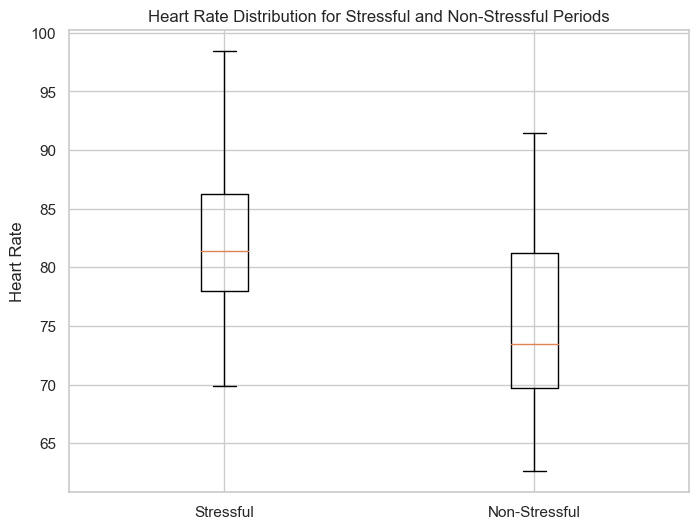

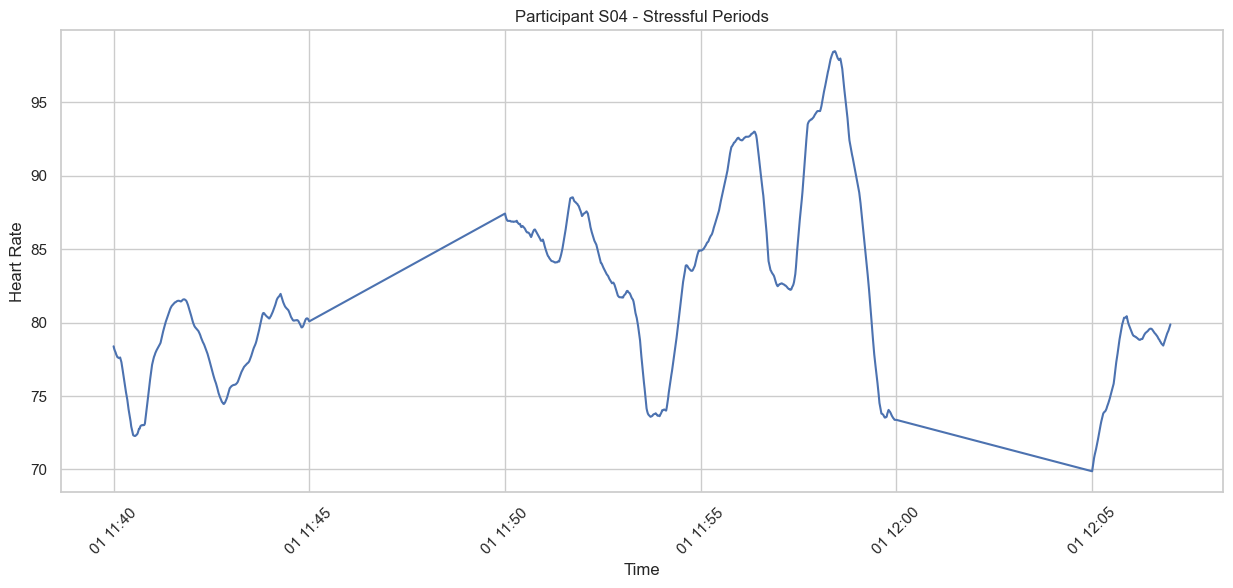

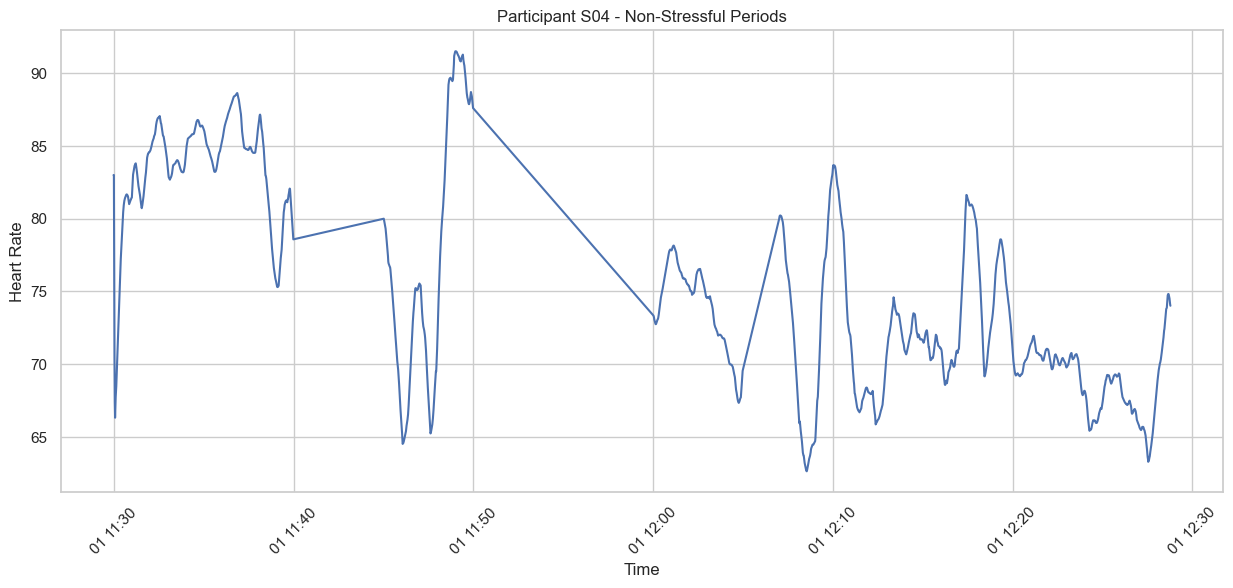

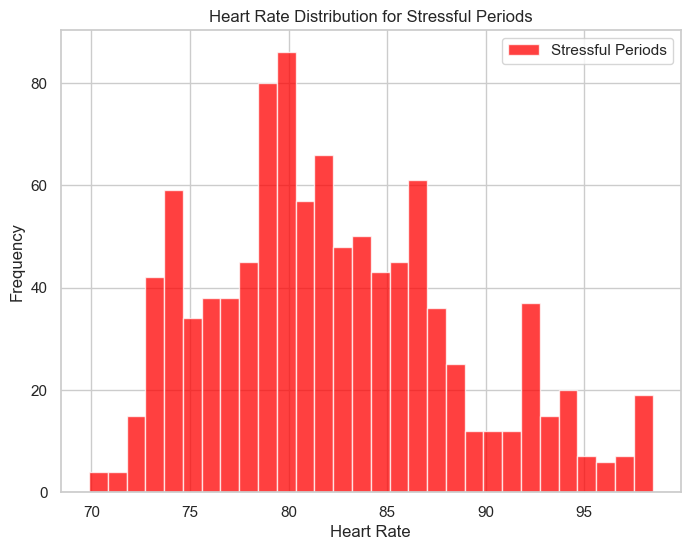

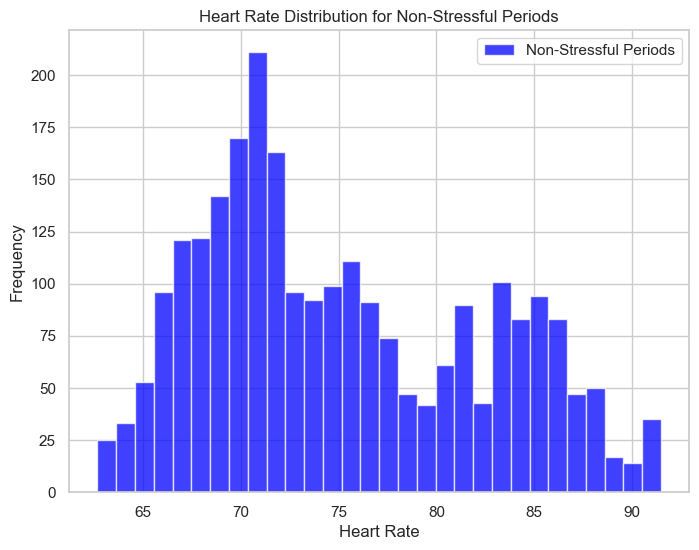

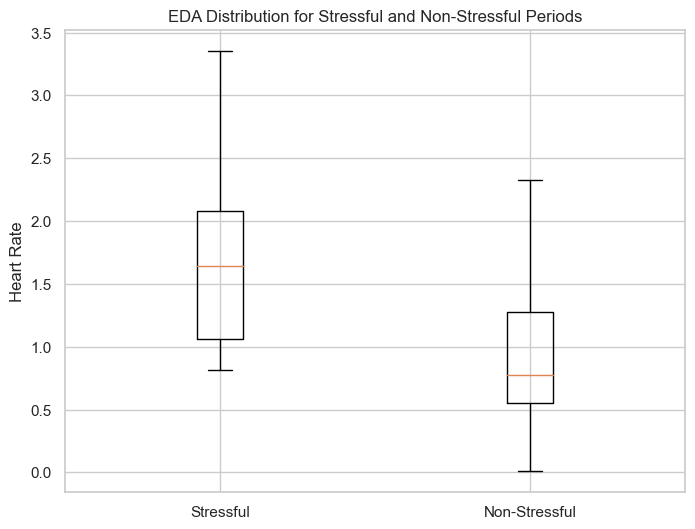

Stroop Test Start Time: 11:04:00
Stroop Test End Time: 11:09:00
relax1_start Time: 11:09:00
relax1_end_time: 11:14:00
Interview Start Time: 11:14:00
Interview End Time: 11:23:00
relax2_start Time: 11:23:00
relax2_end_time: 11:28:00
Hyperventilation Start Time: 11:28:00
Hyperventilation End Time: 11:30:00
relax3_start Time: 11:30:00
relax3_end_time: 11:35:00


C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\386346696.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participant_data['Timestamp'] = pd.to_datetime(participant_data['Timestamp'], format='%H:%M:%S')


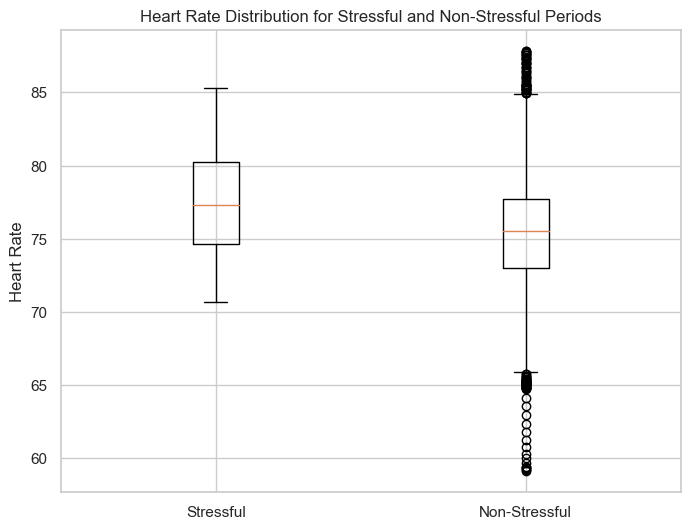

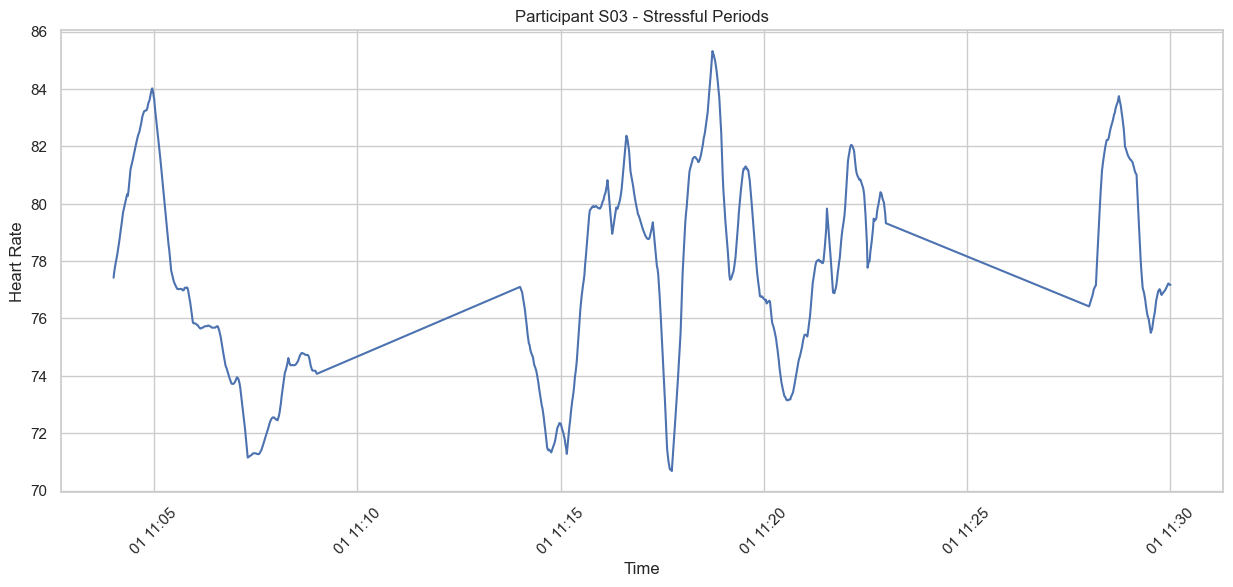

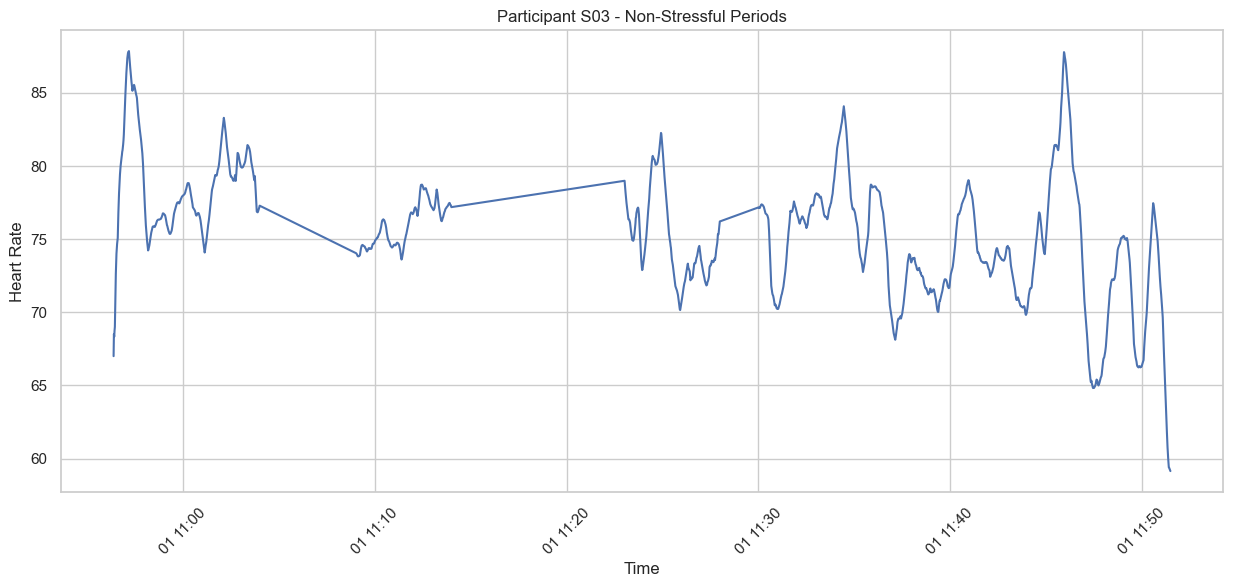

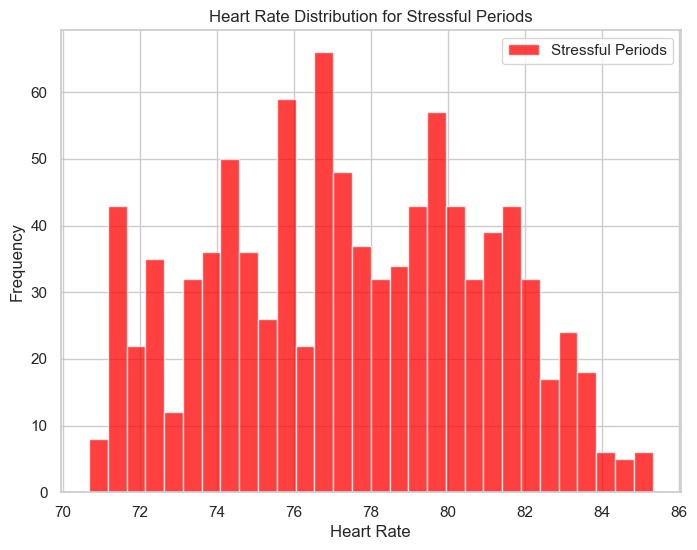

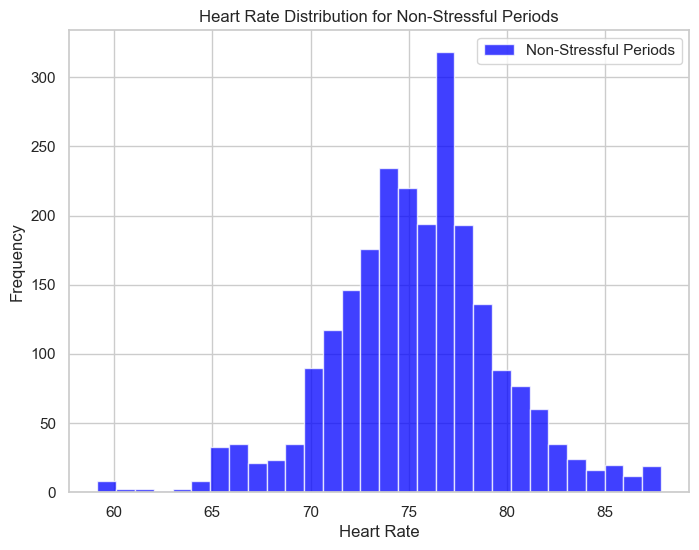

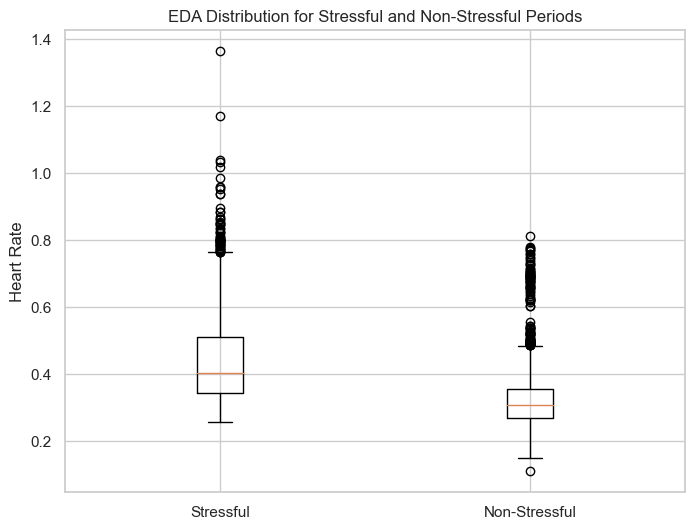

In [58]:
##Step 3
import pandas as pd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Read combined data file
file_path = r'C:\Users\fahad\Documents\PostGrad\CE888\Stress_dataset\Stress-Predict-Dataset-main\participants\modified_combined_data.csv'
time_path = 'C:\\Users\\fahad\\Documents\\PostGrad\\CE888\\Stress_dataset\\Stress-Predict-Dataset-main\\participants\\Time_logs.csv'
combined_data = pd.read_csv(file_path, sep=',')

# Read time log file
time_log = pd.read_csv(time_path, sep=',')

# Update the column names in the time_log DataFrame
time_log.columns = ['S. ID.', 'Start Time', 'End Time', 'Session ID', 'Consent Start', 'Consent End',
                    'Baseline/Questionniare Start', 'Baseline/Questionniare End', 'Stroop Test Start',
                    'Stroop Test End', 'Relax1 Start', 'Relax1 End', 'Interview Start', 'Interview End',
                    'Relax2 Start', 'Relax2 End', 'Hyperventilation Start', 'Hyperventilation End',
                    'Relax3 Start', 'Relax3 End', 'Questionniare Start', 'Questionniare End',
                    'Relax/Baseline Start', 'Relax/Baseline End', 'Unnamed: 24', 'Date']

# Convert Timestamp column to datetime and remove the date part
combined_data['Timestamp'] = pd.to_datetime(combined_data['Timestamp'], format='%H:%M:%S')
combined_data['Timestamp'] = combined_data['Timestamp'].dt.strftime('%H:%M:%S')

def get_formatted_times(participant_log, start_col, end_col):
    start_time = pd.to_datetime(participant_log[start_col], format='%I:%M')
    end_time = pd.to_datetime(participant_log[end_col], format='%I:%M')
    start_time = start_time.strftime('%H:%M:%S')
    end_time = end_time.strftime('%H:%M:%S')
    return start_time, end_time



def plot_hr_data(participant_id, participant_data, title):
    plt.figure(figsize=(15, 6))
    plt.plot(participant_data['Timestamp'], participant_data['HR'])
    plt.title(f'Participant {participant_id} - {title}')
    plt.xlabel('Time')
    plt.ylabel('Heart Rate')
    plt.xticks(rotation=45)
    plt.show()

def plot_box_plot(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.boxplot(data, labels=labels)
    plt.title(title)
    plt.ylabel('Heart Rate')
    plt.show()


def plot_histogram(data, label, title, color):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=30, alpha=0.75, color=color, label=label)
    plt.title(title)
    plt.xlabel('Heart Rate')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()
    

def get_stroop_test_hr(participant_id, combined_data, time_log):
    # Filter combined data for the participant
    participant_data = combined_data.loc[combined_data['participant_number'] == participant_id]

    # Convert Timestamp column to datetime
    participant_data['Timestamp'] = pd.to_datetime(participant_data['Timestamp'], format='%H:%M:%S')

    # Get participant's time log entry
    participant_log = time_log.loc[time_log['S. ID.'] == participant_id].iloc[0]

    # Get HyperVentilation Test start and end times
    HP_start_time = pd.to_datetime(participant_log['Hyperventilation Start'], format='%I:%M')
    HP_end_time = pd.to_datetime(participant_log['Hyperventilation End'], format='%I:%M')
    
    # Get Interview Test start and end times
    IT_start_time = pd.to_datetime(participant_log['Interview Start'], format='%I:%M')
    IT_end_time = pd.to_datetime(participant_log['Interview End'], format='%I:%M')
    
   
    # Get Stroop Test start and end times
    ST_start_time = pd.to_datetime(participant_log['Stroop Test Start'], format='%I:%M')
    ST_end_time = pd.to_datetime(participant_log['Stroop Test End'], format='%I:%M')
    
     # Get relax 1  start and end times
    relax1_start_time = pd.to_datetime(participant_log['Relax1 Start'], format='%I:%M')
    relax1_end_time = pd.to_datetime(participant_log['Relax1 End'], format='%I:%M')
    
    
    # Get relax 2  start and end times
    relax2_start_time = pd.to_datetime(participant_log['Relax2 Start'], format='%I:%M')
    relax2_end_time = pd.to_datetime(participant_log['Relax2 End'], format='%I:%M')
    
    # Get relax 3  start and end times
    relax3_start_time = pd.to_datetime(participant_log['Relax3 Start'], format='%I:%M')
    relax3_end_time = pd.to_datetime(participant_log['Relax3 End'], format='%I:%M')
    
    
    #formatting the console output.
    HP_start_time, HP_end_time = get_formatted_times(participant_log, 'Hyperventilation Start', 'Hyperventilation End')
    interview_start_time, interview_end_time = get_formatted_times(participant_log, 'Interview Start', 'Interview End')
    relax1_start_time,relax1_end_time = get_formatted_times(participant_log, 'Relax1 Start', 'Relax1 End')

    relax2_start_time, relax2_end_time = get_formatted_times(participant_log, 'Relax2 Start', 'Relax2 End')
    relax3_start_time, relax3_end_time = get_formatted_times(participant_log, 'Relax3 Start', 'Relax3 End')
    ST_start_time, ST_end_time = get_formatted_times(participant_log, 'Stroop Test Start', 'Stroop Test End')
    IT_start_time, IT_end_time = get_formatted_times(participant_log, 'Interview Start', 'Interview End')

    
    
    # Format start and end times to display only time
    #start_time = start_time.strftime('%H:%M:%S')
    #end_time = end_time.strftime('%H:%M:%S')

    print("Stroop Test Start Time:", ST_start_time)
    print("Stroop Test End Time:", ST_end_time)
    print("relax1_start Time:", relax1_start_time)
    print("relax1_end_time:", relax1_end_time)
    print("Interview Start Time:", IT_start_time)
    print("Interview End Time:", IT_end_time)    
    print("relax2_start Time:", relax2_start_time)
    print("relax2_end_time:", relax2_end_time)
    print("Hyperventilation Start Time:", HP_start_time)
    print("Hyperventilation End Time:", HP_end_time)
    print("relax3_start Time:", relax3_start_time)
    print("relax3_end_time:", relax3_end_time)
    # Filter data for stressful periods
    stressful_periods = participant_data.loc[participant_data['stress_class'] == 1]
    # Filter data for non-stressful periods
    non_stressful_periods = participant_data.loc[participant_data['stress_class'] == 0]
    plot_box_plot([stressful_periods['HR'], non_stressful_periods['HR']], ['Stressful', 'Non-Stressful'], 'Heart Rate Distribution for Stressful and Non-Stressful Periods')

    # Plot Heart Rate data for stressful and non-stressful periods
    plot_hr_data(participant_id, stressful_periods, 'Stressful Periods')
    plot_hr_data(participant_id, non_stressful_periods, 'Non-Stressful Periods')
    
    plot_histogram(stressful_periods['HR'], 'Stressful Periods', 'Heart Rate Distribution for Stressful Periods', 'red')
    plot_histogram(non_stressful_periods['HR'], 'Non-Stressful Periods', 'Heart Rate Distribution for Non-Stressful Periods', 'blue')

    plot_box_plot([stressful_periods['EDA'], non_stressful_periods['EDA']], ['Stressful', 'Non-Stressful'], 'EDA Distribution for Stressful and Non-Stressful Periods')

    
    return 



participant_id = 'S04'
stroop_test_hr = get_stroop_test_hr(participant_id, combined_data, time_log)
participant_id = 'S03'
stroop_test_hr = get_stroop_test_hr(participant_id, combined_data, time_log)



C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\907184466.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participant_data['Timestamp'] = pd.to_datetime(participant_data['Timestamp'], format='%H:%M:%S')


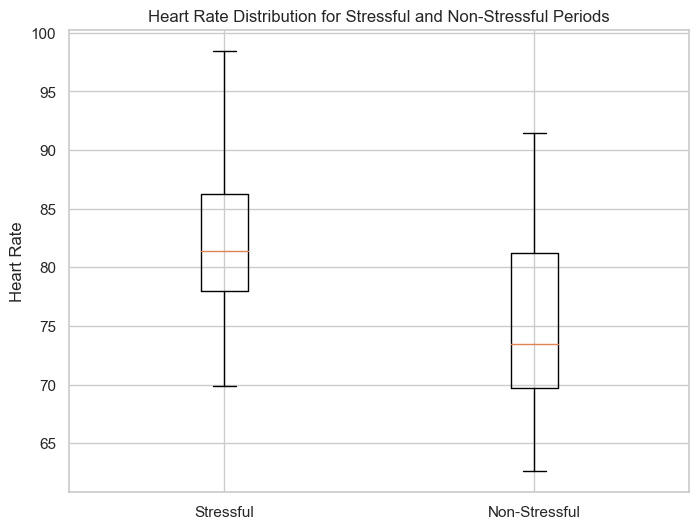

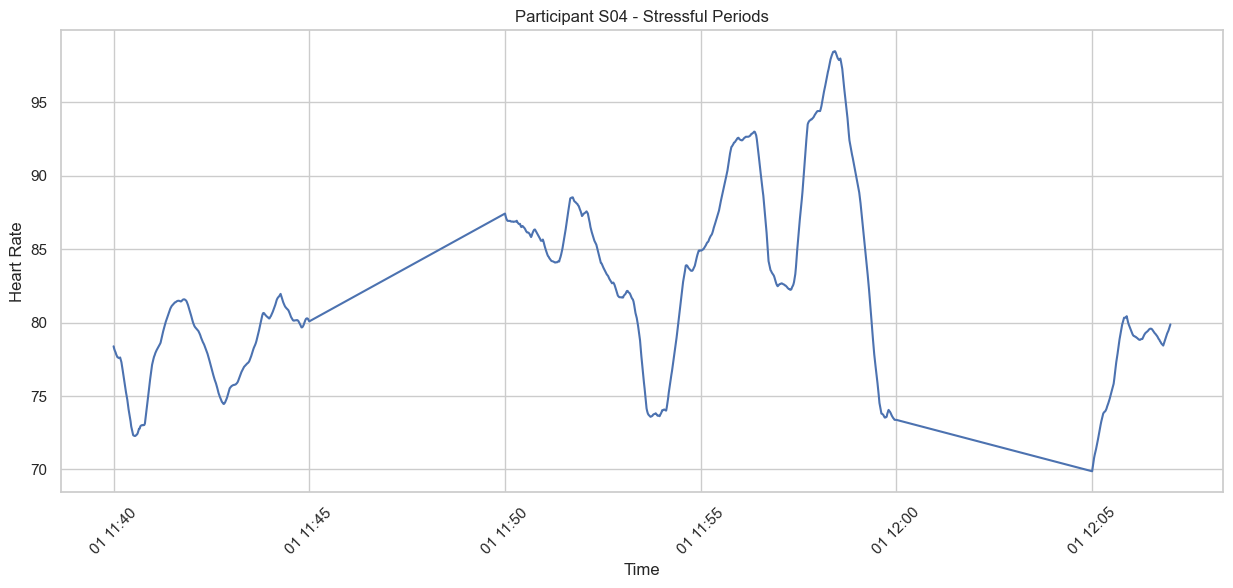

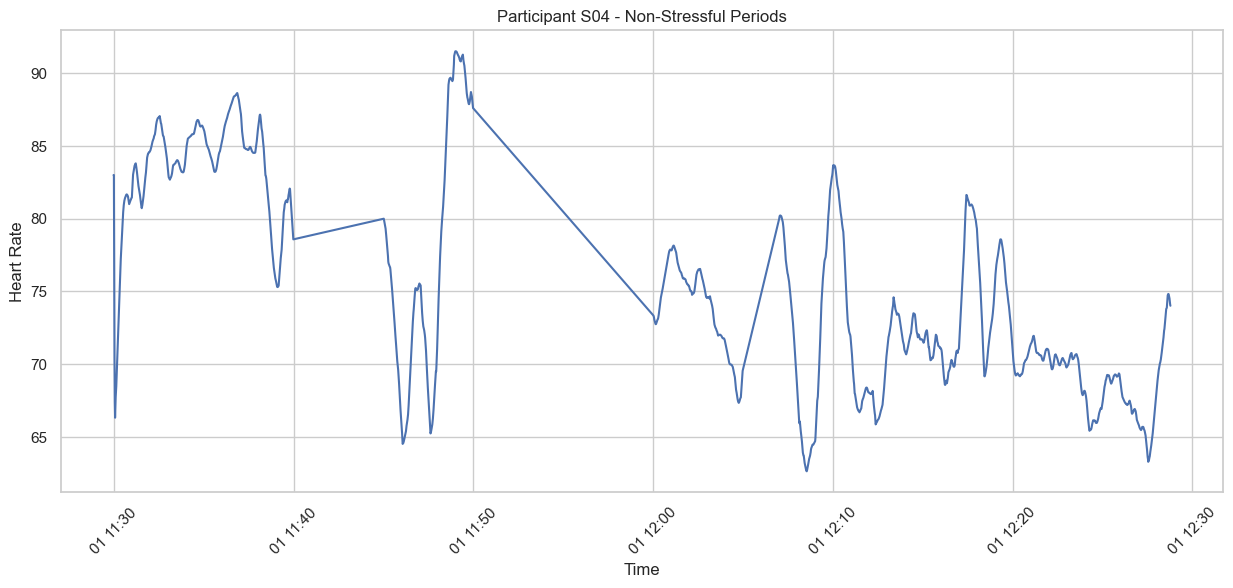

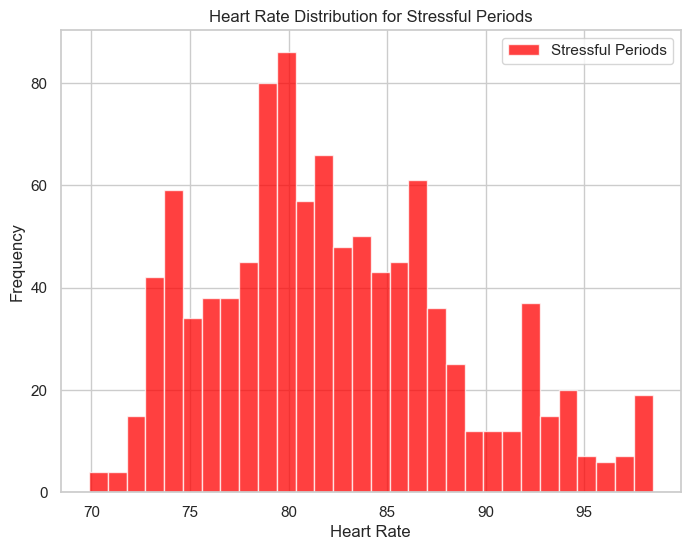

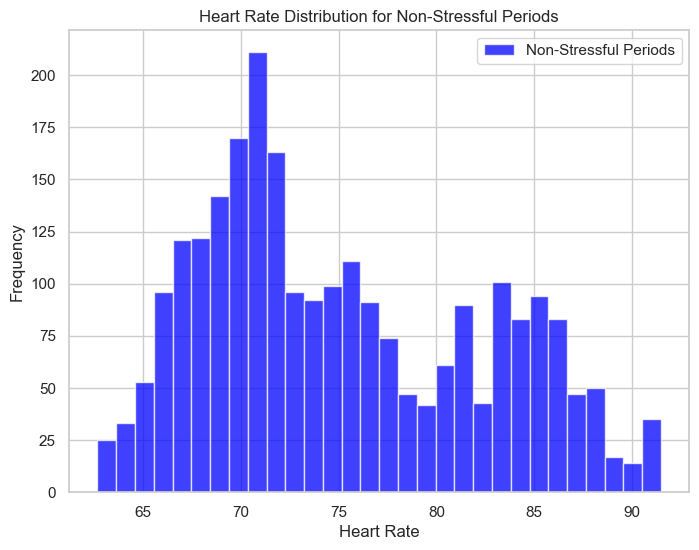

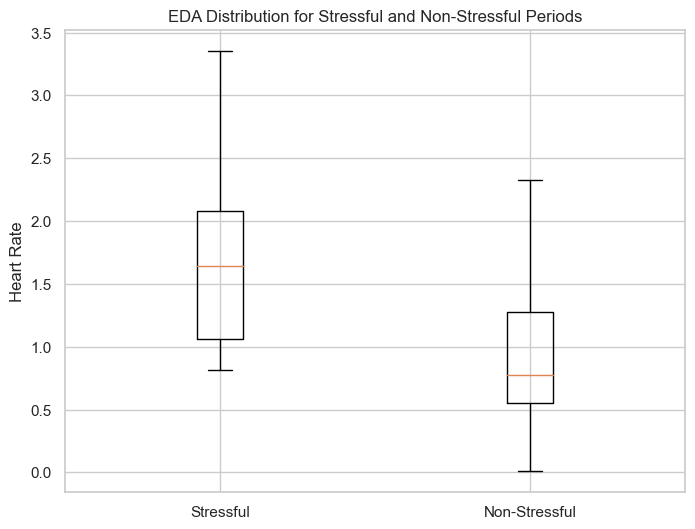

C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\907184466.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participant_data['Timestamp'] = pd.to_datetime(participant_data['Timestamp'], format='%H:%M:%S')


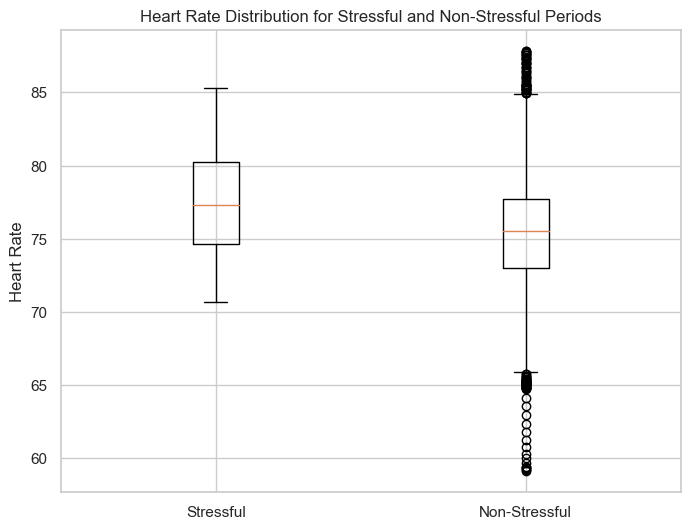

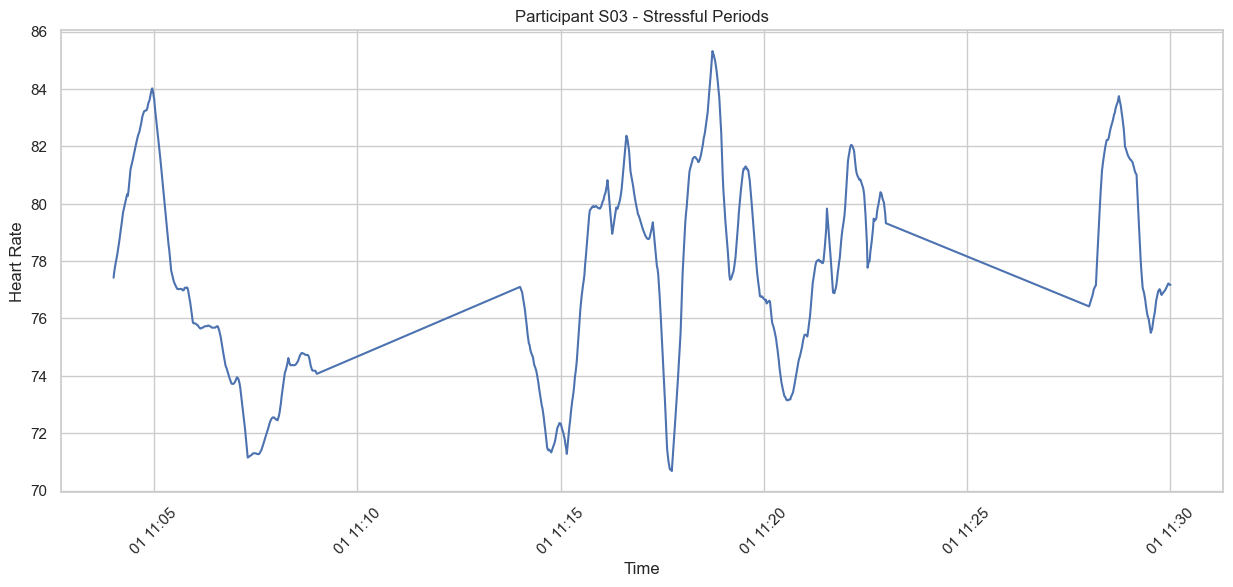

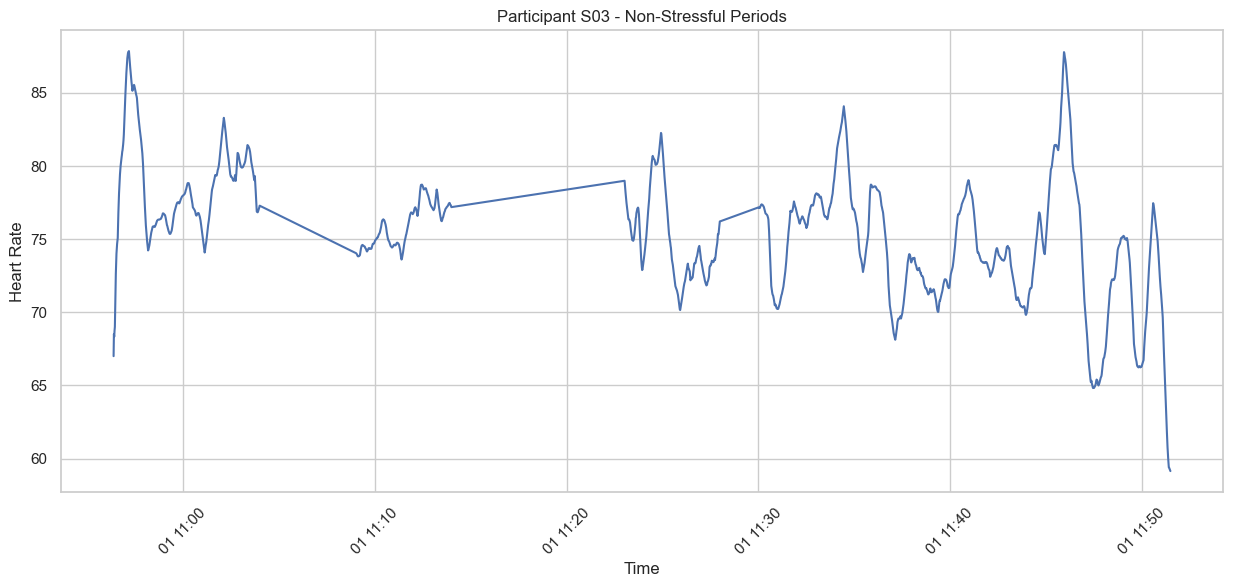

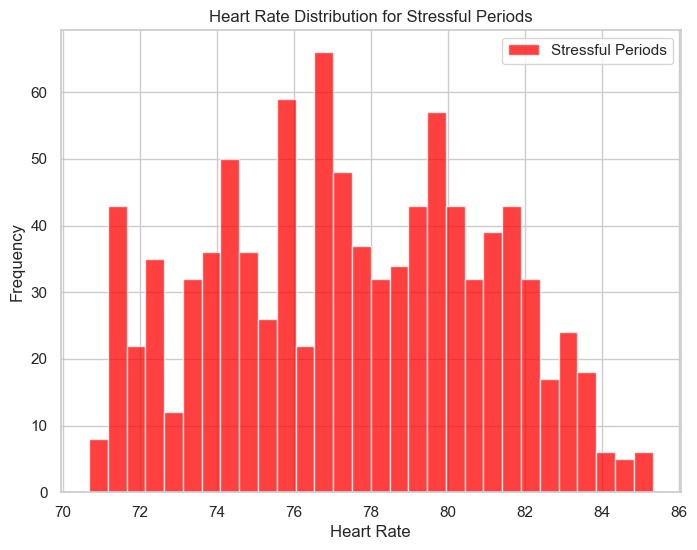

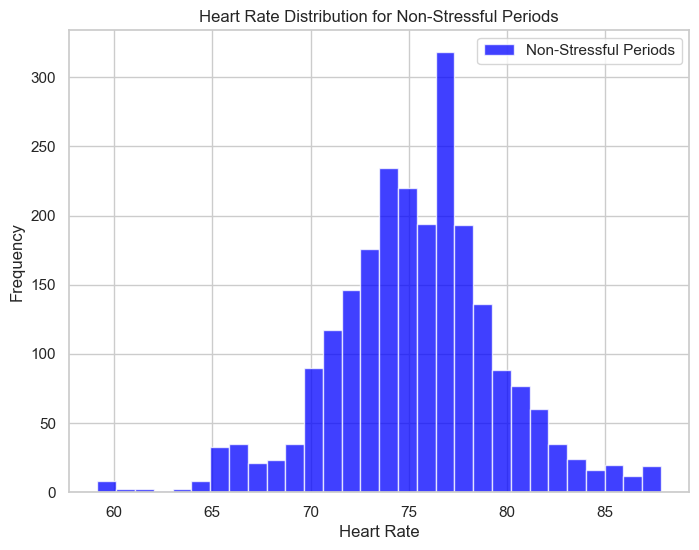

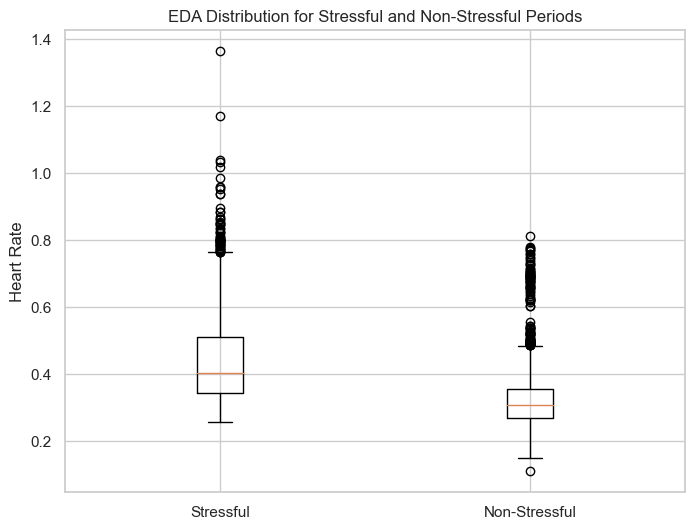

In [59]:
##Step 3
import pandas as pd

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Read combined data file
file_path = r'C:\Users\fahad\Documents\PostGrad\CE888\Stress_dataset\Stress-Predict-Dataset-main\participants\modified_combined_data.csv'
time_path = 'C:\\Users\\fahad\\Documents\\PostGrad\\CE888\\Stress_dataset\\Stress-Predict-Dataset-main\\participants\\Time_logs.csv'
combined_data = pd.read_csv(file_path, sep=',')

# Read time log file
time_log = pd.read_csv(time_path, sep=',')

# Update the column names in the time_log DataFrame

# Convert Timestamp column to datetime and remove the date part
combined_data['Timestamp'] = pd.to_datetime(combined_data['Timestamp'], format='%H:%M:%S')
combined_data['Timestamp'] = combined_data['Timestamp'].dt.strftime('%H:%M:%S')

def get_formatted_times(participant_log, start_col, end_col):
    start_time = pd.to_datetime(participant_log[start_col], format='%I:%M')
    end_time = pd.to_datetime(participant_log[end_col], format='%I:%M')
    start_time = start_time.strftime('%H:%M:%S')
    end_time = end_time.strftime('%H:%M:%S')
    return start_time, end_time



def plot_hr_data(participant_id, participant_data, title):
    plt.figure(figsize=(15, 6))
    plt.plot(participant_data['Timestamp'], participant_data['HR'])
    plt.title(f'Participant {participant_id} - {title}')
    plt.xlabel('Time')
    plt.ylabel('Heart Rate')
    plt.xticks(rotation=45)
    plt.show()

def plot_box_plot(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.boxplot(data, labels=labels)
    plt.title(title)
    plt.ylabel('Heart Rate')
    plt.show()


def plot_histogram(data, label, title, color):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=30, alpha=0.75, color=color, label=label)
    plt.title(title)
    plt.xlabel('Heart Rate')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()
    

def get_stroop_test_hr(participant_id, combined_data):
    # Filter combined data for the participant
    participant_data = combined_data.loc[combined_data['participant_number'] == participant_id]

    # Convert Timestamp column to datetime
    participant_data['Timestamp'] = pd.to_datetime(participant_data['Timestamp'], format='%H:%M:%S')

    # Get participant's time log entry
    # Filter data for stressful periods
    stressful_periods = participant_data.loc[participant_data['stress_class'] == 1]
    # Filter data for non-stressful periods
    non_stressful_periods = participant_data.loc[participant_data['stress_class'] == 0]
    plot_box_plot([stressful_periods['HR'], non_stressful_periods['HR']], ['Stressful', 'Non-Stressful'], 'Heart Rate Distribution for Stressful and Non-Stressful Periods')

    # Plot Heart Rate data for stressful and non-stressful periods
    plot_hr_data(participant_id, stressful_periods, 'Stressful Periods')
    plot_hr_data(participant_id, non_stressful_periods, 'Non-Stressful Periods')
    
    plot_histogram(stressful_periods['HR'], 'Stressful Periods', 'Heart Rate Distribution for Stressful Periods', 'red')
    plot_histogram(non_stressful_periods['HR'], 'Non-Stressful Periods', 'Heart Rate Distribution for Non-Stressful Periods', 'blue')

    plot_box_plot([stressful_periods['EDA'], non_stressful_periods['EDA']], ['Stressful', 'Non-Stressful'], 'EDA Distribution for Stressful and Non-Stressful Periods')

    
    return 



participant_id = 'S04'
stroop_test_hr = get_stroop_test_hr(participant_id, combined_data)
participant_id = 'S03'
stroop_test_hr = get_stroop_test_hr(participant_id, combined_data)

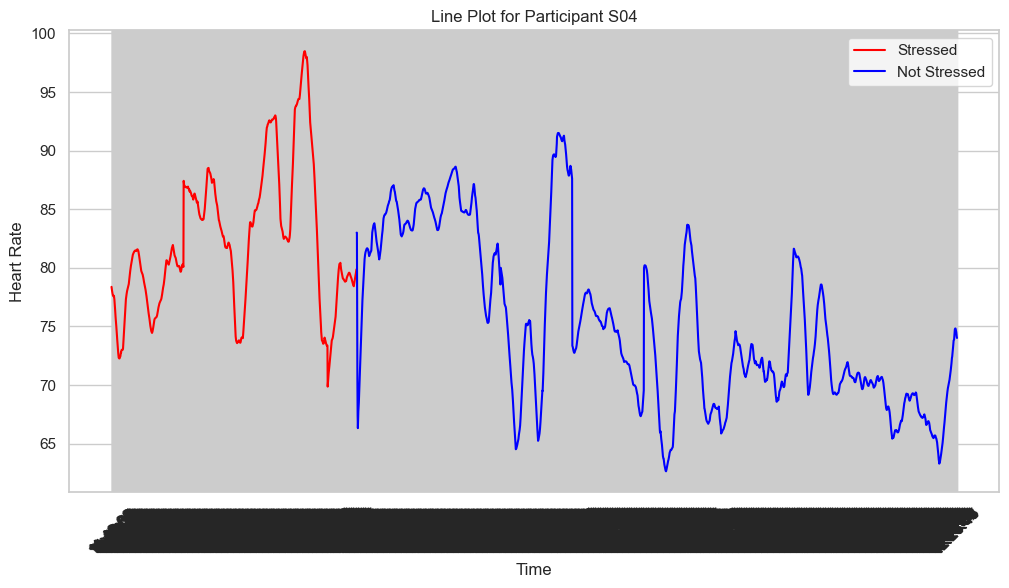

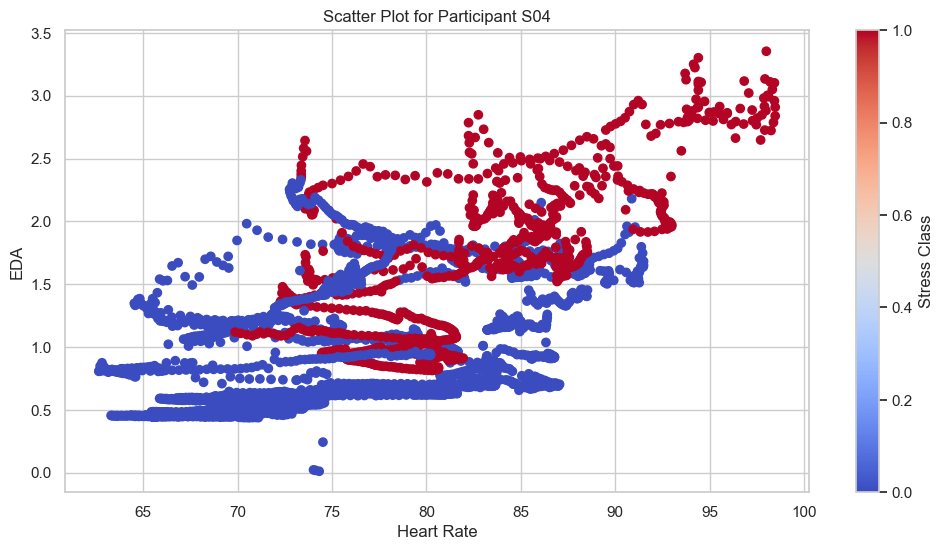

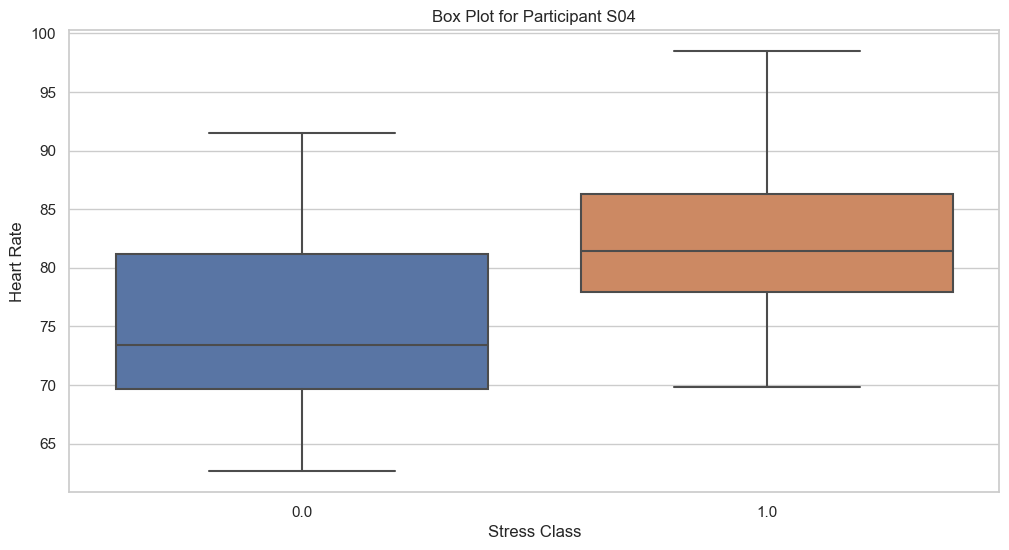

C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\3524382181.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%H:%M:%S')
C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\3524382181.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TimeIndex'] = data['Timestamp'].dt.hour * 60 + data['Timestamp'].dt.minute


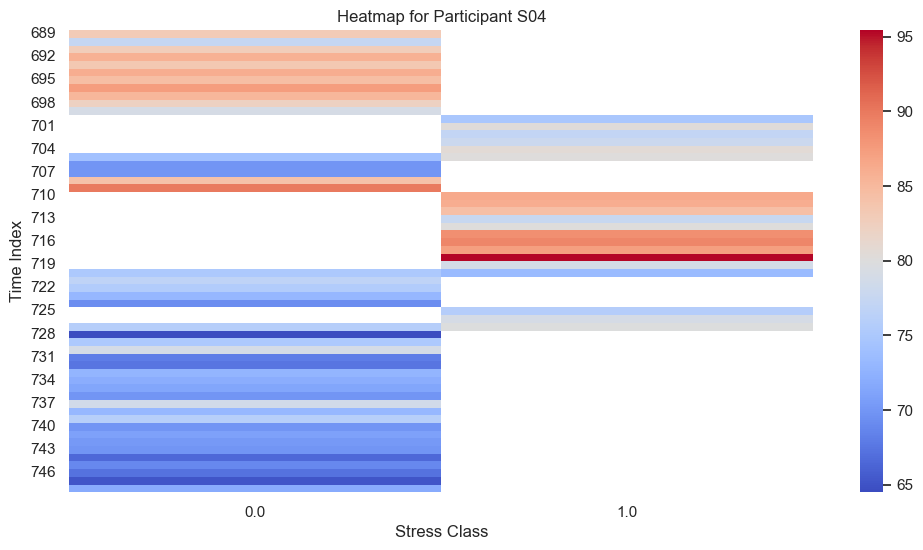

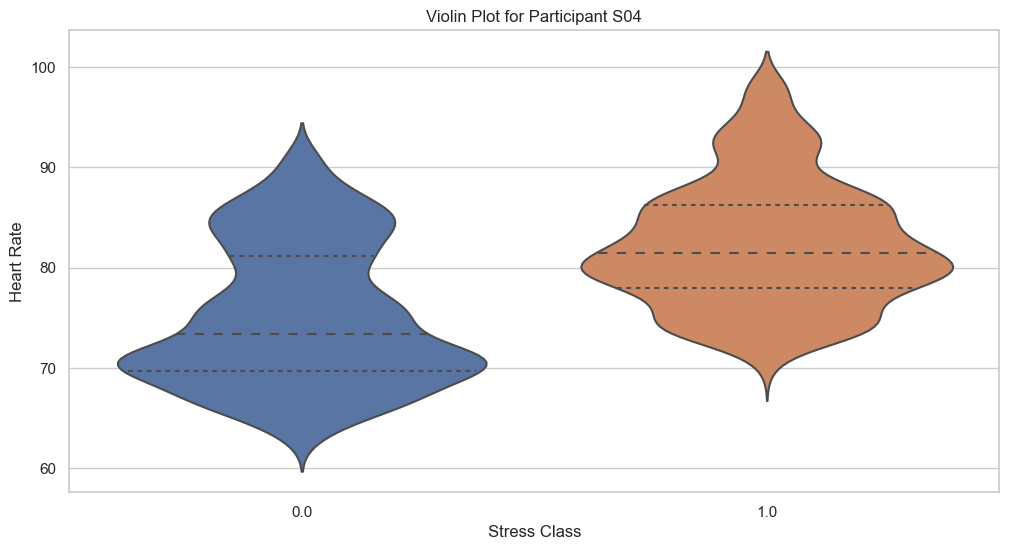

In [60]:
###Participant s04s data



# Load data
file_path = r'C:\Users\fahad\Documents\PostGrad\CE888\Stress_dataset\Stress-Predict-Dataset-main\participants\modified_combined_data.csv'
time_path = 'C:\\Users\\fahad\\Documents\\PostGrad\\CE888\\Stress_dataset\\Stress-Predict-Dataset-main\\participants\\Time_logs.csv'
combined_data = pd.read_csv(file_path, sep=',')
time_log = pd.read_csv(time_path, sep=',')

# Convert Timestamp column to datetime and remove the date part
combined_data['Timestamp'] = pd.to_datetime(combined_data['Timestamp'], format='%H:%M:%S')
combined_data['Timestamp'] = combined_data['Timestamp'].dt.strftime('%H:%M:%S')

# Plot functions
def line_plot(participant_id, data):
    fig, ax = plt.subplots(figsize=(12, 6))
    stressed = data[data['stress_class'] == 1]
    not_stressed = data[data['stress_class'] == 0]
    ax.plot(stressed['Timestamp'], stressed['HR'], color='red', label='Stressed')
    ax.plot(not_stressed['Timestamp'], not_stressed['HR'], color='blue', label='Not Stressed')
    ax.set_title(f'Line Plot for Participant {participant_id}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Heart Rate')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

def scatter_plot(participant_id, data):
    plt.figure(figsize=(12, 6))
    plt.scatter(data['HR'], data['EDA'], c=data['stress_class'], cmap='coolwarm')
    plt.title(f'Scatter Plot for Participant {participant_id}')
    plt.xlabel('Heart Rate')
    plt.ylabel('EDA')
    plt.colorbar().set_label('Stress Class')
    plt.show()

def box_plot(participant_id, data):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='stress_class', y='HR', data=data)
    plt.title(f'Box Plot for Participant {participant_id}')
    plt.xlabel('Stress Class')
    plt.ylabel('Heart Rate')
    plt.show()

def heat_map(participant_id, data):
    data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%H:%M:%S')
    data['TimeIndex'] = data['Timestamp'].dt.hour * 60 + data['Timestamp'].dt.minute
    pivoted_data = data.pivot_table(values='HR', index='TimeIndex', columns='stress_class', aggfunc=np.mean)
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivoted_data, cmap='coolwarm')
    plt.title(f'Heatmap for Participant {participant_id}')
    plt.xlabel('Stress Class')
    plt.ylabel('Time Index')
    plt.show()

def violin_plot(participant_id, data):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='stress_class', y='HR', data=data, inner='quartile')
    plt.title(f'Violin Plot for Participant {participant_id}')
    plt.xlabel('Stress Class')
    plt.ylabel('Heart Rate')
    plt.show()

# Example usage
participant_id = 'S04'
participant_data = combined_data.loc[combined_data['participant_number'] == participant_id]

line_plot(participant_id, participant_data)
scatter_plot(participant_id,participant_data)
box_plot(participant_id, participant_data)
heat_map(participant_id, participant_data)
violin_plot(participant_id, participant_data)

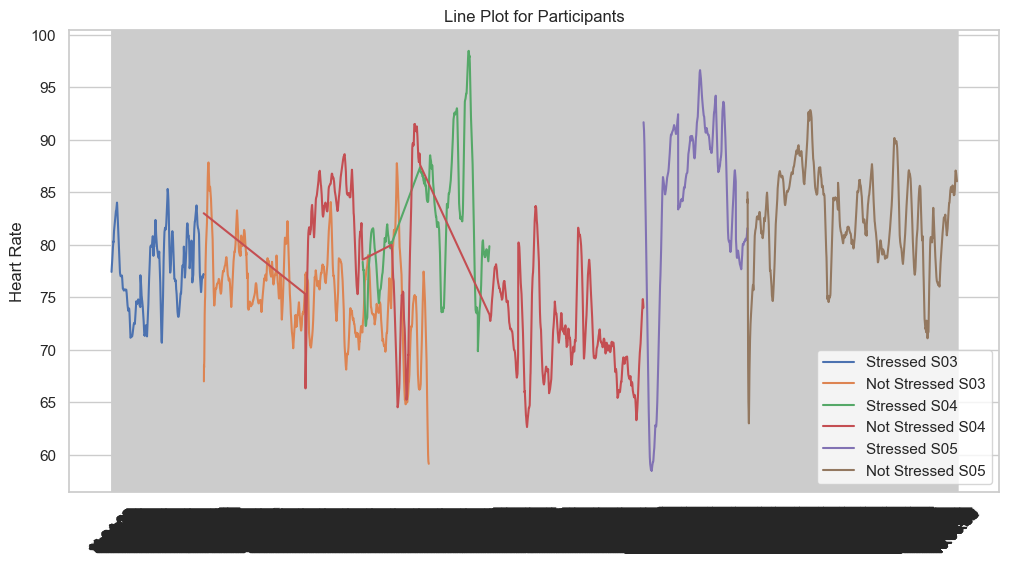

In [61]:
# Plot functions
def line_plot(participant_ids, data_list):
    fig, ax = plt.subplots(figsize=(12, 6))

    for i, data in enumerate(data_list):
        participant_id = participant_ids[i]
        stressed = data[data['stress_class'] == 1]
        not_stressed = data[data['stress_class'] == 0]
        ax.plot(stressed['Timestamp'], stressed['HR'], label=f'Stressed {participant_id}')
        ax.plot(not_stressed['Timestamp'], not_stressed['HR'], label=f'Not Stressed {participant_id}')

    ax.set_title('Line Plot for Participants')
    ax.set_ylabel('Heart Rate')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

def scatter_plot(participant_ids, data_list):
    plt.figure(figsize=(12, 6))
    for i, data in enumerate(data_list):
        plt.scatter(data['HR'], data['EDA'], c=data['stress_class'], cmap='coolwarm', label=f'Participant {participant_ids[i]}')
    
    plt.title('Scatter Plot for Participants')
    plt.xlabel('Heart Rate')
    plt.ylabel('EDA')
    plt.colorbar().set_label('Stress Class')
    plt.legend()
    plt.show()

def box_plot(participant_ids, data_list):
    plt.figure(figsize=(12, 6))
    for i, data in enumerate(data_list):
        data['participant_number'] = participant_ids[i]
    
    combined_data = pd.concat(data_list)
    sns.boxplot(x='participant_number', y='HR', hue='stress_class', data=combined_data)
    plt.title('Box Plot for Participants')
    plt.xlabel('Participant ID')
    plt.ylabel('Heart Rate')
    plt.show()

def heat_map(participant_ids, data_list):
    plt.figure(figsize=(12, 6))
    for i, data in enumerate(data_list):
        data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%H:%M:%S')
        data['TimeIndex'] = data['Timestamp'].dt.hour * 60 + data['Timestamp'].dt.minute
        pivoted_data = data.pivot_table(values='HR', index='TimeIndex', columns='stress_class', aggfunc=np.mean)
        sns.heatmap(pivoted_data, cmap='coolwarm', alpha=0.5, cbar=False, linewidths=1, linecolor='white', label=f'Participant {participant_ids[i]}')
    
    plt.title('Heatmap for Participants')
    plt.xlabel('Stress Class')
    plt.ylabel('Time Index')
    plt.legend()
    plt.show()

def violin_plot(participant_ids, data_list):
    plt.figure(figsize=(12, 6))
    for  i, data in enumerate(data_list):
        data['participant_number'] = participant_ids[i]
        combined_data = pd.concat(data_list)
        sns.violinplot(x='participant_number', y='HR', hue='stress_class', data=combined_data, inner='quartile', split=True)
    
    plt.title('Violin Plot for Participants')
    plt.xlabel('Participant ID')
    plt.ylabel('Heart Rate')
    plt.show()

# Example usage
participant_ids = ['S03', 'S04', 'S05']
data_list = [combined_data.loc[combined_data['participant_number'] == participant_id] for participant_id in participant_ids]

#line_plot(participant_ids, data_list)
#scatter_plot(participant_ids, data_list)
#box_plot(participant_ids, data_list)
#heat_map(participant_ids, data_list)
#violin_plot(participant_ids, data_list)

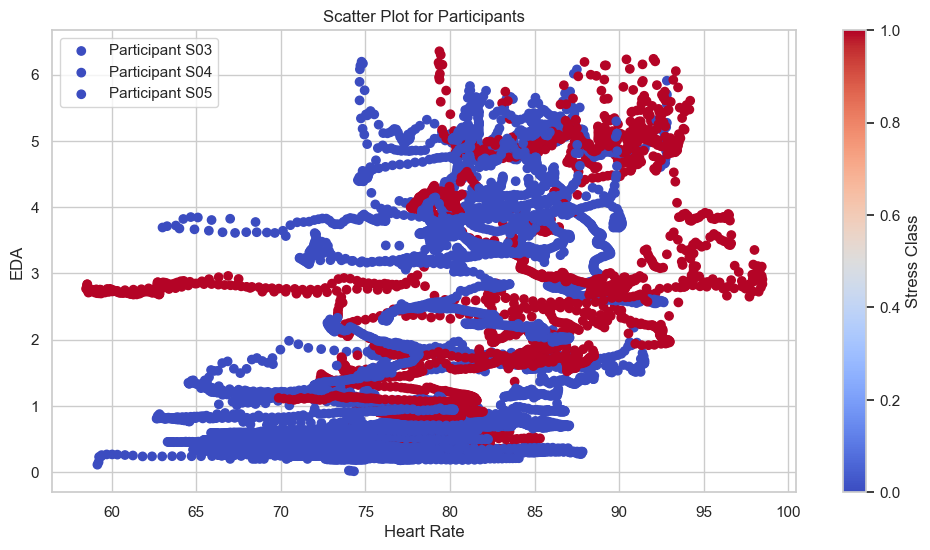

In [62]:
scatter_plot(participant_ids, data_list)


C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\1784898757.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['participant_number'] = participant_ids[i]


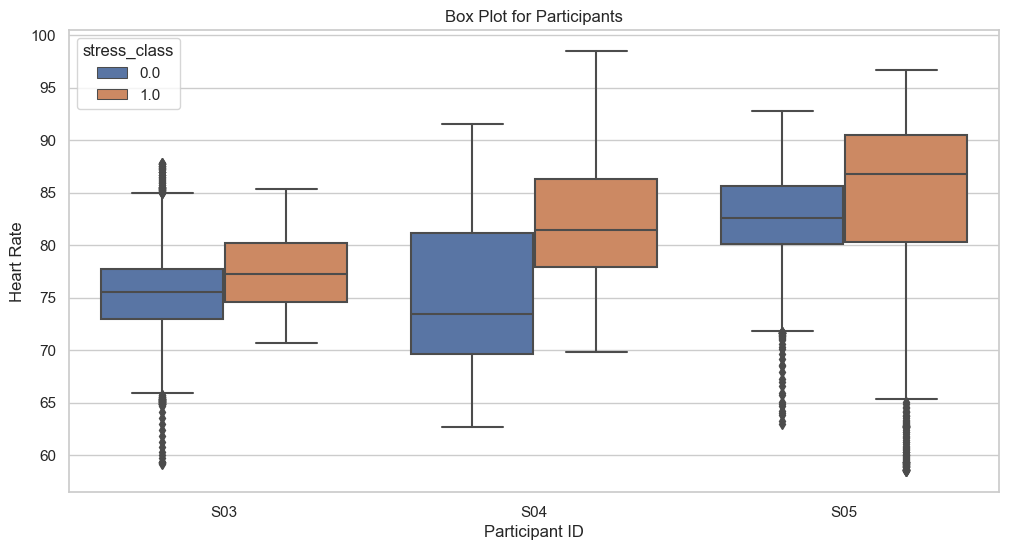

In [63]:
box_plot(participant_ids, data_list)


C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\1784898757.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['participant_number'] = participant_ids[i]
C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\1784898757.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['participant_number'] = participant_ids[i]
C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\1784898757.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

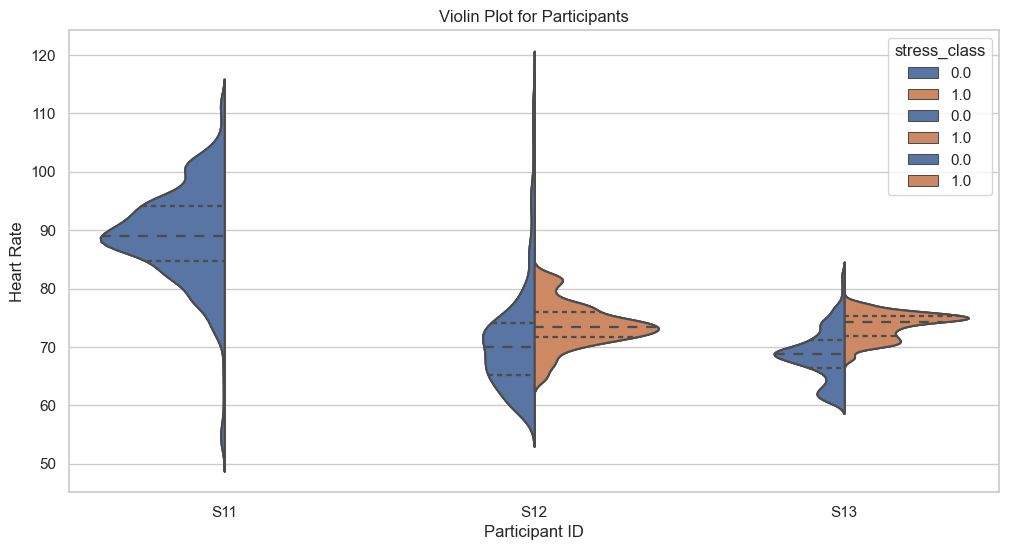

In [64]:
import matplotlib.dates as mdates

# Plot functions
def line_plot(participant_ids, data_list):
    fig, ax = plt.subplots(figsize=(12, 6))

    for i, data in enumerate(data_list):
        participant_id = participant_ids[i]
        stressed = data[data['stress_class'] == 1]
        not_stressed = data[data['stress_class'] == 0]
        ax.plot(stressed['Timestamp'], stressed['HR'], label=f'Stressed {participant_id}')
        ax.plot(not_stressed['Timestamp'], not_stressed['HR'], label=f'Not Stressed {participant_id}')

    ax.set_title('Line Plot for Participants')
    ax.set_ylabel('Heart Rate')
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()


def heat_map(participant_ids, data_list):
    plt.figure(figsize=(12, 6))
    for i, data in enumerate(data_list):
        data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%H:%M:%S')
        data['TimeIndex'] = data['Timestamp'].dt.hour * 60 + data['Timestamp'].dt.minute
        pivoted_data = data.pivot_table(values='HR', index='TimeIndex', columns='stress_class', aggfunc=np.mean)
        sns.heatmap(pivoted_data, cmap='coolwarm', alpha=0.5, cbar=False, linewidths=1, linecolor='white', label=f'Participant {participant_ids[i]}')
    
    plt.title('Heatmap for Participants')
    plt.xlabel('Stress Class')
    plt.ylabel('Time Index (minutes)')
    plt.legend()
    plt.show()

# Add participant ids accordingly 
participant_ids = ['S11', 'S12', 'S13']
data_list = [combined_data.loc[combined_data['participant_number'] == participant_id] for participant_id in participant_ids]

#line_plot(participant_ids, data_list)
#scatter_plot(participant_ids, data_list)
#box_plot(participant_ids, data_list)
#heat_map(participant_ids, data_list)
violin_plot(participant_ids, data_list)


### EDA DATA ANALYSIS

In [65]:
import matplotlib.dates as mdates

# Plot functions
def line_plot(participant_ids, data_list):
    fig, ax = plt.subplots(figsize=(12, 6))

    for i, data in enumerate(data_list):
        participant_id = participant_ids[i]
        stressed = data[data['stress_class'] == 1]
        not_stressed = data[data['stress_class'] == 0]
        ax.plot(stressed['Timestamp'], stressed['EDA'], label=f'Stressed {participant_id}')
        ax.plot(not_stressed['Timestamp'], not_stressed['EDA'], label=f'Not Stressed {participant_id}')

    ax.set_title('Line Plot for Participants')
    ax.set_ylabel('EDA')
    ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

def scatter_plot(participant_ids, data_list):
    plt.figure(figsize=(12, 6))
    for i, data in enumerate(data_list):
        plt.scatter(data['HR'], data['EDA'], c=data['stress_class'], cmap='coolwarm', label=f'Participant {participant_ids[i]}')

    plt.title('Scatter Plot for Participants')
    plt.xlabel('Heart Rate')
    plt.ylabel('EDA')
    plt.colorbar().set_label('Stress Class')
    plt.legend()
    plt.show()

def box_plot(participant_ids, data_list):
    plt.figure(figsize=(12, 6))
    for i, data in enumerate(data_list):
        data['participant_number'] = participant_ids[i]

    combined_data = pd.concat(data_list)
    sns.boxplot(x='participant_number', y='EDA', hue='stress_class', data=combined_data)
    plt.title('Box Plot for Participants')
    plt.xlabel('Participant ID')
    plt.ylabel('EDA')
    plt.show()

def heat_map(participant_ids, data_list):
    plt.figure(figsize=(12, 6))
    for i, data in enumerate(data_list):
        data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%H:%M:%S')
        data['TimeIndex'] = data['Timestamp'].dt.hour * 60 + data['Timestamp'].dt.minute
        pivoted_data = data.pivot_table(values='EDA', index='TimeIndex', columns='stress_class', aggfunc=np.mean)
        sns.heatmap(pivoted_data, cmap='coolwarm', alpha=0.5, cbar=False, linewidths=1, linecolor='white', label=f'Participant {participant_ids[i]}')

    plt.title('Heatmap for Participants')
    plt.xlabel('Stress Class')
    plt.ylabel('Time Index (minutes)')
    plt.legend()
    plt.show()

def violin_plot(participant_ids, data_list):
    plt.figure(figsize=(12, 6))
    for i, data in enumerate(data_list):
        data['participant_number'] = participant_ids[i]

    combined_data = pd.concat(data_list)
    sns.violinplot(x='participant_number', y='EDA', hue='stress_class', data=combined_data, inner='quartile', split=True)

    plt.title('Violin Plot for Participants')
    plt.xlabel('Participant ID')
    plt.ylabel('EDA')
    plt.show()

# Add participant ids accordingly
participant_ids = ['S03', 'S04', 'S05']
data_list = [combined_data.loc[combined_data['participant_number'] == participant_id] for participant_id in participant_ids]

#line_plot(participant_ids, data_list)
#scatter_plot(participant_ids, data_list)
#box_plot(participant_ids, data_list)
#heat_map(participant_ids, data_list)


C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\2717878496.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['participant_number'] = participant_ids[i]


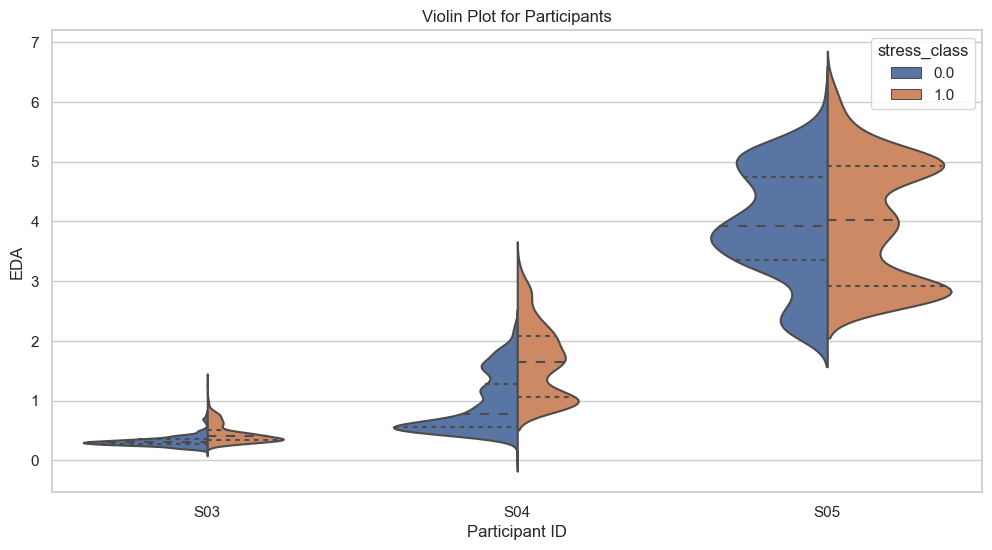

In [66]:
violin_plot(participant_ids, data_list)

C:\Users\fahad\AppData\Local\Temp\ipykernel_11100\2717878496.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['participant_number'] = participant_ids[i]


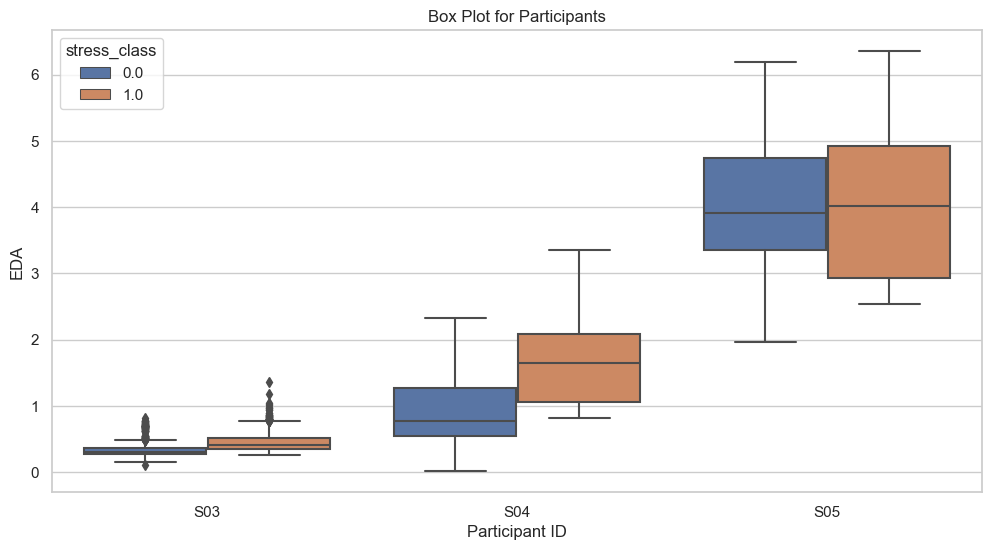

In [67]:
box_plot(participant_ids, data_list)


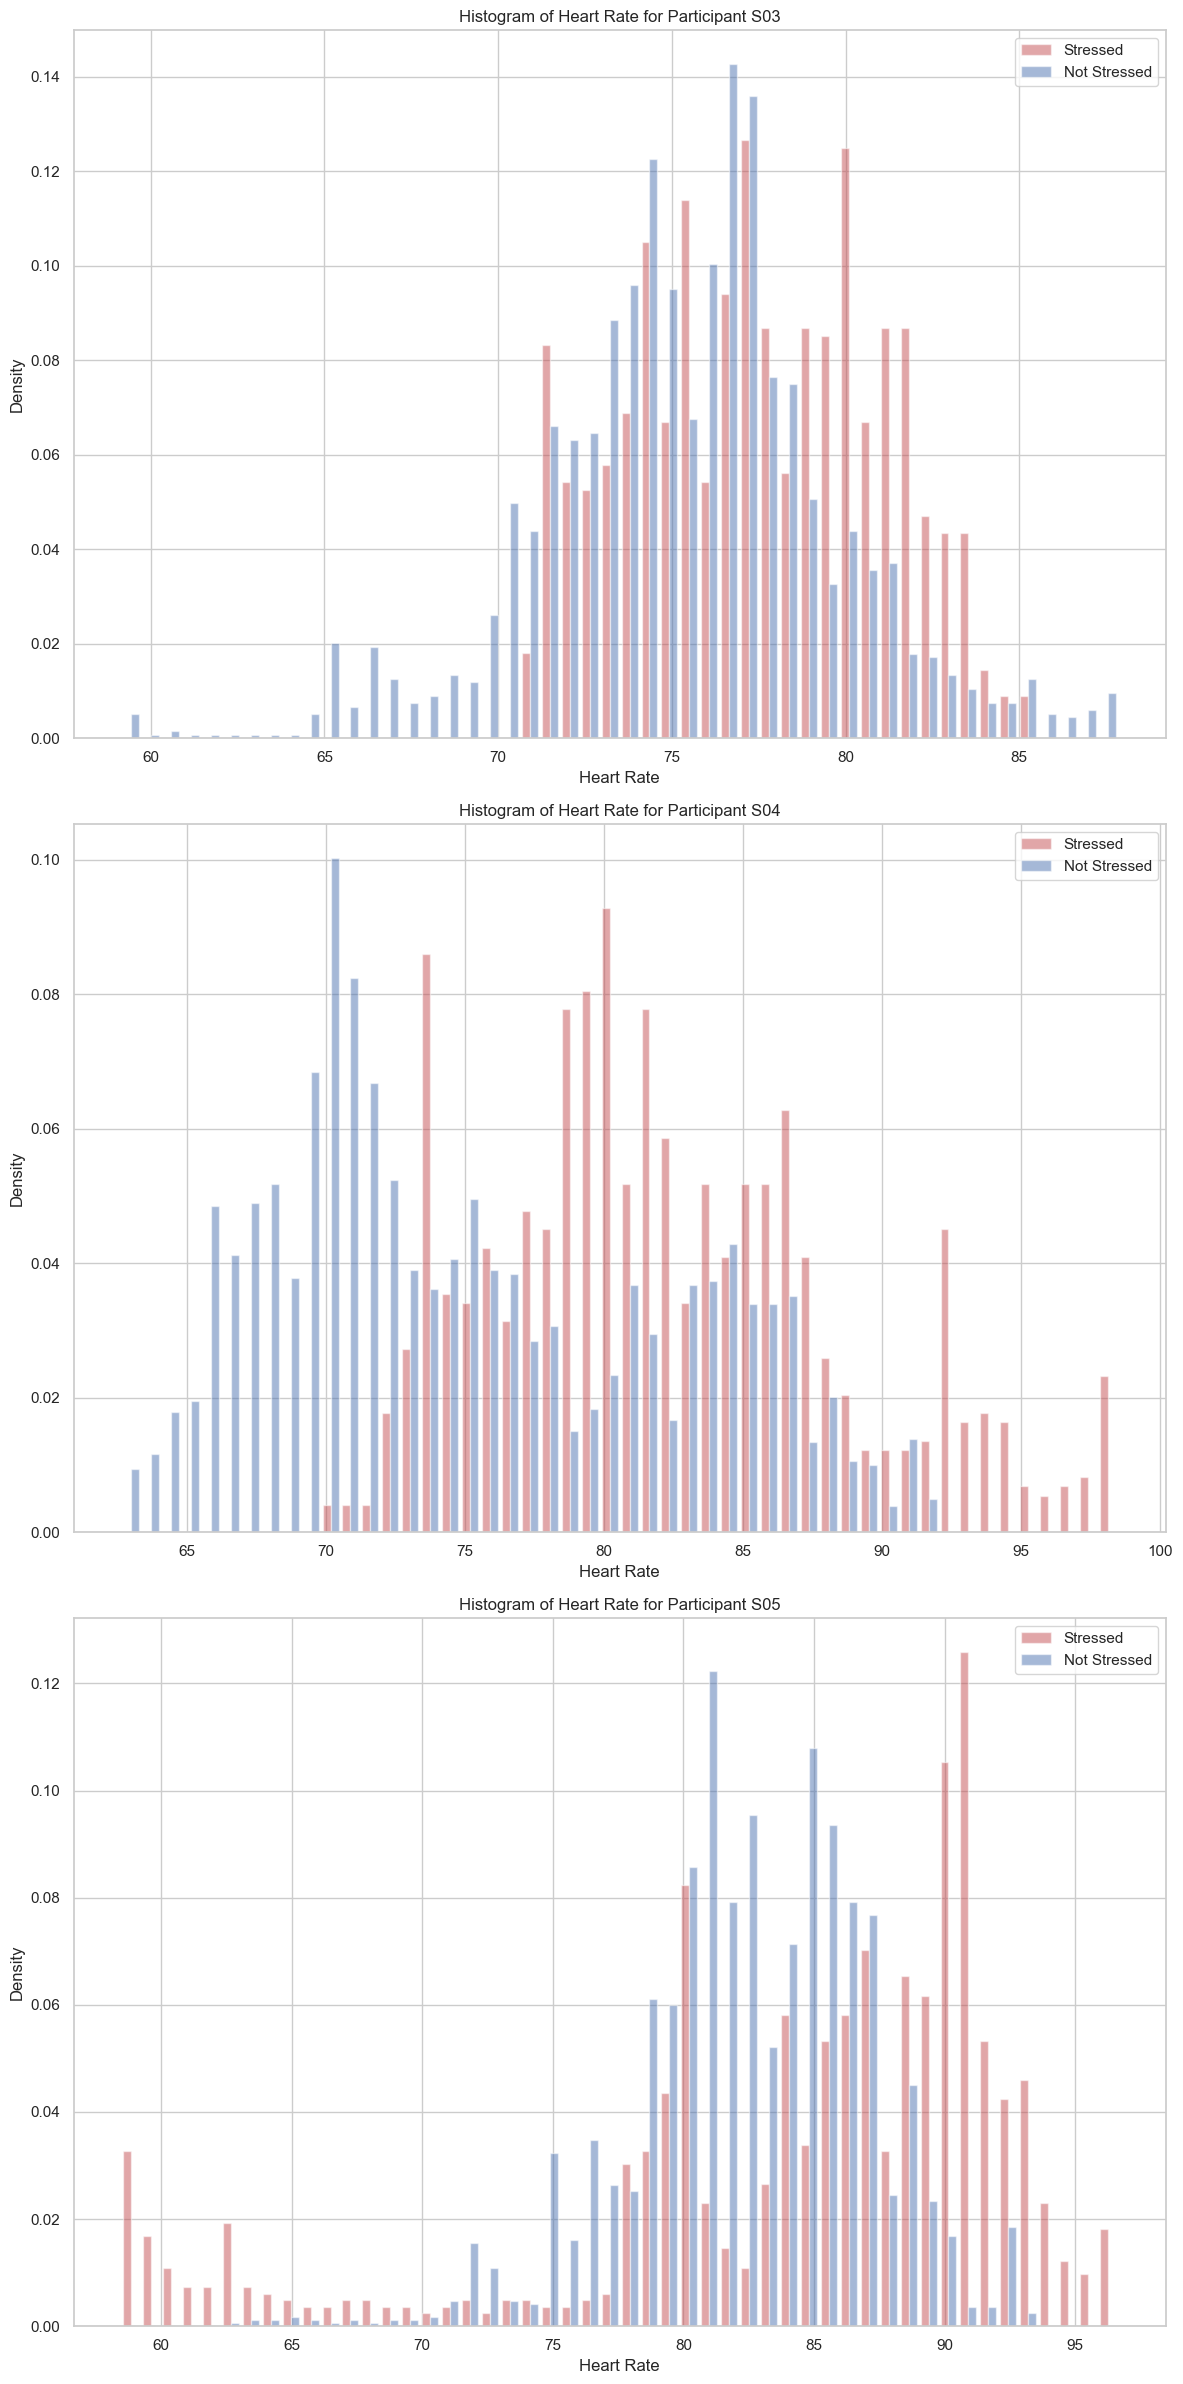

In [68]:
def histogram_plot(participant_ids, data_list):
    fig, ax = plt.subplots(len(data_list), 1, figsize=(12, 8*len(data_list)))
    
    for i, data in enumerate(data_list):
        participant_id = participant_ids[i]
        stressed = data[data['stress_class'] == 1]
        not_stressed = data[data['stress_class'] == 0]
        ax[i].hist([stressed['HR'], not_stressed['HR']], bins=50, density=True, color=['r', 'b'], alpha=0.5, label=['Stressed', 'Not Stressed'])
        ax[i].set_title(f'Histogram of Heart Rate for Participant {participant_id}')
        ax[i].set_xlabel('Heart Rate')
        ax[i].set_ylabel('Density')
        ax[i].legend()
    
    plt.tight_layout()
    plt.show()
histogram_plot(participant_ids, data_list)

